# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

#Report: Optimising NYC Taxi Operations

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [2]:
# Import warnings

# type: ignore

In [3]:
# Import the libraries you will be using for analysis

#For numerical data


import numpy as np
import pandas as pd 
import glob

#For data visualization
import seaborn as sns 
import matplotlib.pyplot as plt 

In [4]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.2.4
pandas version: 2.2.3
matplotlib version: 3.10.1
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [5]:
# Try loading one file

# df = pd.read_parquet('2023-1.parquet')
# df.info()
df = pd.read_parquet(r"C:\Users\Vedan\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records\2023-12.parquet")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3333925 entries, 0 to 3376566
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir(r'C:\Users\Vedan\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records')

# Create a list of all the twelve files to read
file_list = [f for f in os.listdir() if f.endswith('.parquet')] #os.listdir()

# initialise an empty dataframe
df_final = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        df = pd.read_parquet(file_path)


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime']) # Reading the current file

        #extract date and hour
        df['date'] = df['tpep_pickup_datetime'].dt.date
        df['hour'] = df['tpep_pickup_datetime'].dt.hour
        
        
        #sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in df['date'].unique():
            day_data=df[df['date']==date]
            # Iterate through each hour of the selected date
            for hour in range(24):
                hour_data=day_data[day_data['hour']==hour]

                # Sample 5% of the hourly data randomly
                sample =hour_data.sample(frac=0.05,random_state=42)
        
                # add data of this hour to the dataframe
        
                # Concatenate the sampled data of all the dates to a single dataframe
                # we initialised this empty DF earlier
                df_final = pd.concat([df_final, sample], ignore_index=True)

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [7]:
# Store the df in csv/parquet
output_file=(r'C:\Users\Vedan\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records\Output\sampled_data.parquet')
df_final.to_parquet(output_file, index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [8]:
# Load the new data file

df1=pd.read_parquet(r"C:\Users\Vedan\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records\Output\sampled_data.parquet")

In [9]:
df1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour,Airport_fee
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,...,0.5,0.00,0.0,1.0,41.15,0.0,1.25,2023-01-01,0,NaN
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,...,0.5,2.58,0.0,1.0,15.48,2.5,0.00,2023-01-01,0,NaN
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,...,0.5,0.00,0.0,1.0,16.40,2.5,0.00,2023-01-01,0,NaN
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,2,...,0.5,0.00,0.0,1.0,11.50,2.5,0.00,2023-01-01,0,NaN
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,None,66,107,0,...,0.5,5.93,0.0,1.0,35.57,NaN,NaN,2023-01-01,0,NaN


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [11]:
# Fix the index and drop any columns that are not needed

print(df1.index)

RangeIndex(start=0, stop=1896400, step=1)


In [12]:
missing_values = 100*df1.isnull().mean()
print(missing_values)

VendorID                  0.000000
tpep_pickup_datetime      0.000000
tpep_dropoff_datetime     0.000000
passenger_count           3.420903
trip_distance             0.000000
RatecodeID                3.420903
store_and_fwd_flag        3.420903
PULocationID              0.000000
DOLocationID              0.000000
payment_type              0.000000
fare_amount               0.000000
extra                     0.000000
mta_tax                   0.000000
tip_amount                0.000000
tolls_amount              0.000000
improvement_surcharge     0.000000
total_amount              0.000000
congestion_surcharge      3.420903
airport_fee              92.170270
date                      0.000000
hour                      0.000000
Airport_fee              11.250633
dtype: float64


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [13]:
# Combine the two airport fee columns

df2=df1.copy()
df2['total_airport_fee']=df2['airport_fee']+df2['Airport_fee']

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [14]:
# check where values of fare amount are negative

has_negative = (df2['fare_amount'] < 0).any()

print("Has negative values:", has_negative)

Has negative values: False


Did you notice something different in the `RatecodeID` column for above records?

In [15]:
# Analyse RatecodeID for the negative fare amounts

filtered_df = df2[df2['fare_amount'] < 0]

# Display how column1 changes when column2 is negative
print(filtered_df[['RatecodeID', 'fare_amount']])

Empty DataFrame
Columns: [RatecodeID, fare_amount]
Index: []


In [16]:
# Find which columns have negative values

numeric_columns = df2.select_dtypes(include=['int64', 'float64'])

negative_columns = numeric_columns.columns[(numeric_columns < 0).any()]

print("Columns with negative values:", negative_columns)

Columns with negative values: Index(['extra', 'mta_tax', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'Airport_fee'],
      dtype='object')


In [17]:
# fix these negative values

df2[negative_columns] = df2[negative_columns].applymap(lambda x: 0 if x < 0 else x)

print(df2)

C:\Users\Vedan\AppData\Local\Temp\ipykernel_13068\1223603237.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df2[negative_columns] = df2[negative_columns].applymap(lambda x: 0 if x < 0 else x)


         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1               2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2               2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3               2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4               2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
...           ...                  ...                   ...              ...   
1896395         2  2023-09-30 23:46:34   2023-09-30 23:53:20              1.0   
1896396         1  2023-09-30 23:44:51   2023-09-30 23:49:05              3.0   
1896397         2  2023-09-30 23:11:05   2023-09-30 23:18:42              1.0   
1896398         1  2023-09-30 23:26:31   2023-10-01 00:04:05              2.0   
1896399         2  2023-09-30 23:19:47   2023-09-30 23:33:36              1.0   

         trip_distance  Rat

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [18]:
# Find the proportion of missing values in each column

100 * df2.isnull().mean()

VendorID                   0.000000
tpep_pickup_datetime       0.000000
tpep_dropoff_datetime      0.000000
passenger_count            3.420903
trip_distance              0.000000
RatecodeID                 3.420903
store_and_fwd_flag         3.420903
PULocationID               0.000000
DOLocationID               0.000000
payment_type               0.000000
fare_amount                0.000000
extra                      0.000000
mta_tax                    0.000000
tip_amount                 0.000000
tolls_amount               0.000000
improvement_surcharge      0.000000
total_amount               0.000000
congestion_surcharge       3.420903
airport_fee               92.170270
date                       0.000000
hour                       0.000000
Airport_fee               11.250633
total_airport_fee        100.000000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [19]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
rows_nulls = df2[df2.isnull().any(axis=1)]

print("Rows with missing values:\n", rows_nulls)

df2['passenger_count'] = df2['passenger_count'].fillna(df2['passenger_count'].median())

Rows with missing values:
          VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1               2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2               2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3               2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4               2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
...           ...                  ...                   ...              ...   
1896395         2  2023-09-30 23:46:34   2023-09-30 23:53:20              1.0   
1896396         1  2023-09-30 23:44:51   2023-09-30 23:49:05              3.0   
1896397         2  2023-09-30 23:11:05   2023-09-30 23:18:42              1.0   
1896398         1  2023-09-30 23:26:31   2023-10-01 00:04:05              2.0   
1896399         2  2023-09-30 23:19:47   2023-09-30 23:33:36              1.0   



In [20]:
100 * df2.isnull().mean()

VendorID                   0.000000
tpep_pickup_datetime       0.000000
tpep_dropoff_datetime      0.000000
passenger_count            0.000000
trip_distance              0.000000
RatecodeID                 3.420903
store_and_fwd_flag         3.420903
PULocationID               0.000000
DOLocationID               0.000000
payment_type               0.000000
fare_amount                0.000000
extra                      0.000000
mta_tax                    0.000000
tip_amount                 0.000000
tolls_amount               0.000000
improvement_surcharge      0.000000
total_amount               0.000000
congestion_surcharge       3.420903
airport_fee               92.170270
date                       0.000000
hour                       0.000000
Airport_fee               11.250633
total_airport_fee        100.000000
dtype: float64

Did you find zeroes in passenger_count? Handle these.

In [21]:
zero_passengers = df2[df2['passenger_count'] == 0]

# Print the result
print("Rows with zero passenger_count:\n", zero_passengers)

Rows with zero passenger_count:
          VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
118             2  2023-01-01 00:47:28   2023-01-01 00:47:32              0.0   
192             1  2023-01-01 00:50:09   2023-01-01 01:14:29              0.0   
197             1  2023-01-01 00:23:01   2023-01-01 00:32:42              0.0   
234             1  2023-01-01 00:42:48   2023-01-01 00:52:02              0.0   
235             1  2023-01-01 00:58:49   2023-01-01 01:04:32              0.0   
...           ...                  ...                   ...              ...   
1895962         1  2023-09-30 22:09:45   2023-09-30 22:14:52              0.0   
1895986         1  2023-09-30 22:42:00   2023-09-30 22:56:02              0.0   
1896083         1  2023-09-30 23:04:02   2023-09-30 23:05:11              0.0   
1896224         1  2023-09-30 23:26:07   2023-09-30 23:38:31              0.0   
1896326         1  2023-09-30 23:34:15   2023-09-30 23:39:31              0.

In [22]:
#Handling zero passanger_count
df2['passenger_count'] = df2['passenger_count'].replace(0, df2['passenger_count'].median())

# Print the result
print("Rows with zero passenger_count:\n", zero_passengers)


Rows with zero passenger_count:
          VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
118             2  2023-01-01 00:47:28   2023-01-01 00:47:32              0.0   
192             1  2023-01-01 00:50:09   2023-01-01 01:14:29              0.0   
197             1  2023-01-01 00:23:01   2023-01-01 00:32:42              0.0   
234             1  2023-01-01 00:42:48   2023-01-01 00:52:02              0.0   
235             1  2023-01-01 00:58:49   2023-01-01 01:04:32              0.0   
...           ...                  ...                   ...              ...   
1895962         1  2023-09-30 22:09:45   2023-09-30 22:14:52              0.0   
1895986         1  2023-09-30 22:42:00   2023-09-30 22:56:02              0.0   
1896083         1  2023-09-30 23:04:02   2023-09-30 23:05:11              0.0   
1896224         1  2023-09-30 23:26:07   2023-09-30 23:38:31              0.0   
1896326         1  2023-09-30 23:34:15   2023-09-30 23:39:31              0.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [23]:
# Fix missing values in 'RatecodeID'

missing_ratecode = df2['RatecodeID'].isnull().sum()
print(f"Missing values in 'RatecodeID': {missing_ratecode}")


Missing values in 'RatecodeID': 64874


In [24]:
#Imputingb missing values with mode

df2['RatecodeID'] = df2['RatecodeID'].fillna(df2['RatecodeID'].mode()[0])

In [25]:
#Printing the result after imputing with mode

missing_ratecode = df2['RatecodeID'].isnull().sum()
print(f"Missing values in 'RatecodeID': {missing_ratecode}")

Missing values in 'RatecodeID': 0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [26]:
# handle null values in congestion_surcharge
missing_values = df2['congestion_surcharge'].isnull().sum()
print(f"Missing values in 'congestion_surcharge': {missing_values}")



Missing values in 'congestion_surcharge': 64874


In [27]:
#replacing nulls with median

df2['congestion_surcharge'] = df2['congestion_surcharge'].fillna(df2['congestion_surcharge'].median())

#Printing the result

missing_values = df2['congestion_surcharge'].isnull().sum()
print(f"Missing values in 'congestion_surcharge': {missing_values}")


Missing values in 'congestion_surcharge': 0


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [28]:
# Handle any remaining missing values

print(df2.isnull().sum())

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count                0
trip_distance                  0
RatecodeID                     0
store_and_fwd_flag         64874
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge           0
airport_fee              1747917
date                           0
hour                           0
Airport_fee               213357
total_airport_fee        1896400
dtype: int64


In [29]:
#Handing missing values in store_and_fwd_flag
df2['store_and_fwd_flag'] = df2['store_and_fwd_flag'].fillna(df2['store_and_fwd_flag'].mode()[0])

#Printing the result

missing_values = df2['store_and_fwd_flag'].isnull().sum()
print(f"Missing values in 'store_and_fwd_flag': {missing_values}")

Missing values in 'store_and_fwd_flag': 0


In [30]:
#All nulls has been handled

print(df2.isnull().sum())

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count                0
trip_distance                  0
RatecodeID                     0
store_and_fwd_flag             0
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge           0
airport_fee              1747917
date                           0
hour                           0
Airport_fee               213357
total_airport_fee        1896400
dtype: int64


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

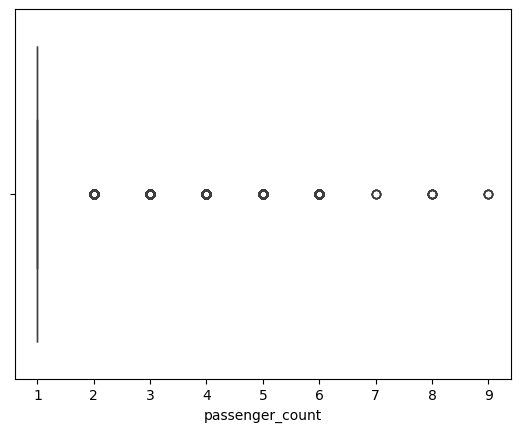

In [31]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

#Box plot for passenger count
sns.boxplot(data=df2, x='passenger_count')  
plt.show()

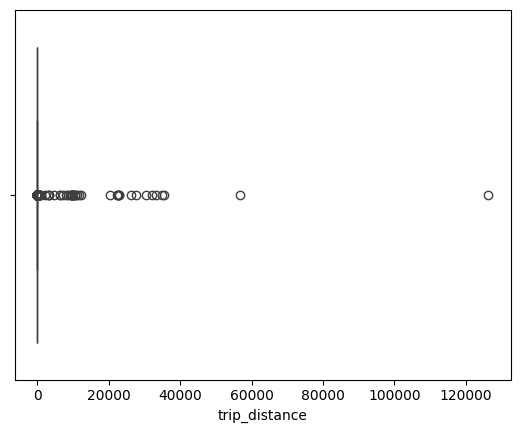

In [32]:
#Boxplot for trip_distance

sns.boxplot(data=df2, x='trip_distance')  
plt.show()

In [33]:
# Function to detect and remove outliers using IQR method
def detect_outliers_iqr(df2, trip_distance):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df2['trip_distance'].quantile(0.25)
    Q3 = df2['trip_distance'].quantile(0.75)
    
    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    # Define outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    outliers = df2[(df2['trip_distance'] < lower_bound) | (df2['trip_distance'] > upper_bound)]
    
    print(f"Outliers in {'trip_distance'}:")
    print(outliers)
    
    return outliers


outliers = detect_outliers_iqr(df2, 'trip_distance')

Outliers in trip_distance:
         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
4               2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   
5               1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   
8               2  2023-01-01 00:44:09   2023-01-01 01:01:17              1.0   
15              2  2023-01-01 00:41:50   2023-01-01 01:14:50              1.0   
...           ...                  ...                   ...              ...   
1896379         2  2023-09-30 23:15:20   2023-09-30 23:40:18              1.0   
1896380         2  2023-09-30 23:15:08   2023-09-30 23:37:49              1.0   
1896389         2  2023-09-30 23:53:03   2023-10-01 00:13:48              1.0   
1896394         1  2023-09-30 23:00:09   2023-09-30 23:59:38              4.0   
1896398         1  2023-09-30 23:26:31   2023-10-01 00:04:05              2.0   



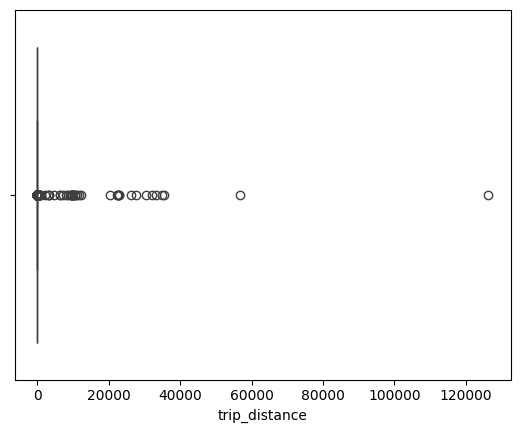

In [34]:
sns.boxplot(data=df2, x='trip_distance')  
plt.show()

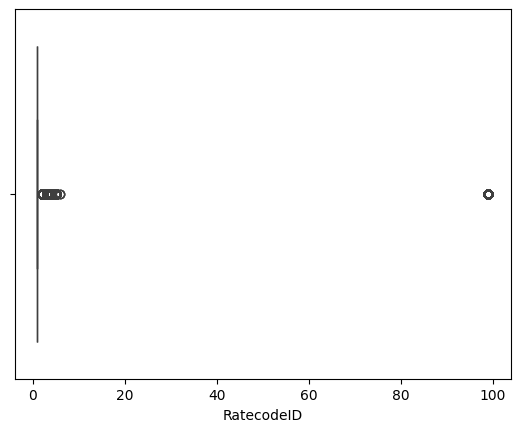

In [35]:

#Boxplot for RatecodeID

sns.boxplot(data=df2, x='RatecodeID')  
plt.show()

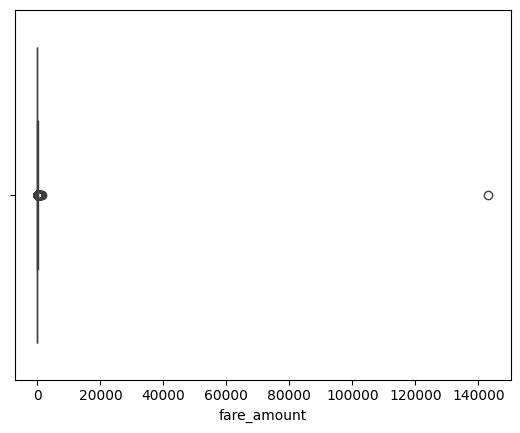

In [36]:
#Boxplot for fare_amount

sns.boxplot(data=df2, x='fare_amount')  
plt.show()

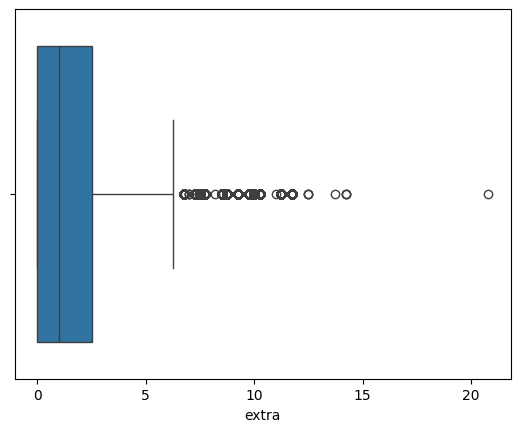

In [37]:
#Boxplot for extra

sns.boxplot(data=df2, x='extra')  
plt.show()

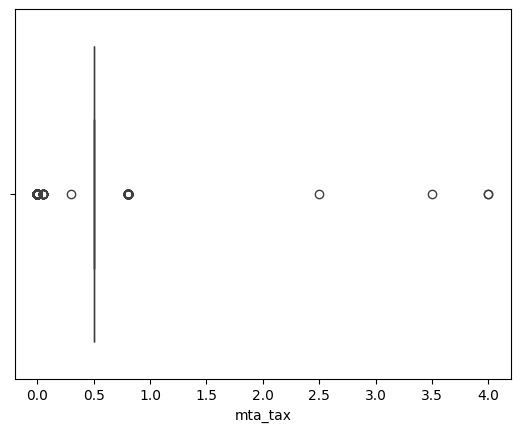

In [38]:
#Boxplot for mta_tax

sns.boxplot(data=df2, x='mta_tax')  
plt.show()

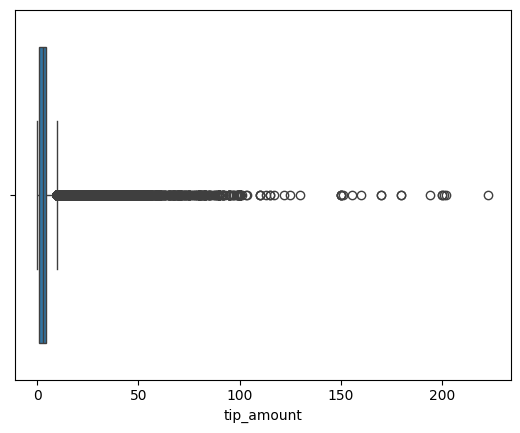

In [39]:
#Boxplot for tip_amount

sns.boxplot(data=df2, x='tip_amount')  
plt.show()

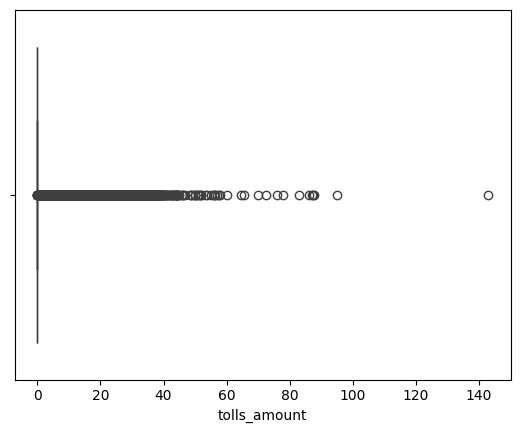

In [40]:
#Boxplot for tolls_amount

sns.boxplot(data=df2, x='tolls_amount')  
plt.show()

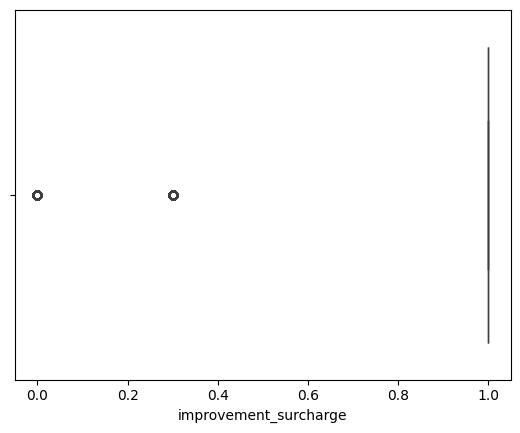

In [41]:
#Boxplot for improvement_surcharge

sns.boxplot(data=df2, x='improvement_surcharge')  
plt.show()

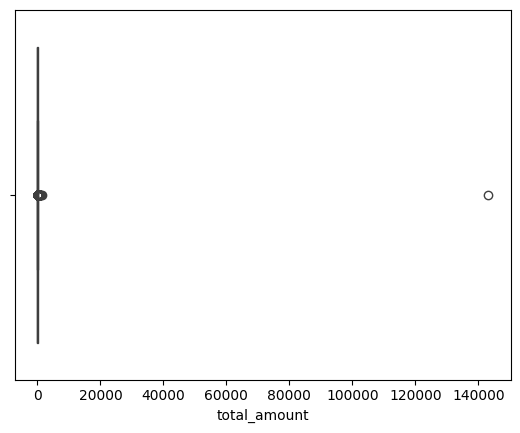

In [42]:
#Boxplot for total_amount

sns.boxplot(data=df2, x='total_amount')  
plt.show()

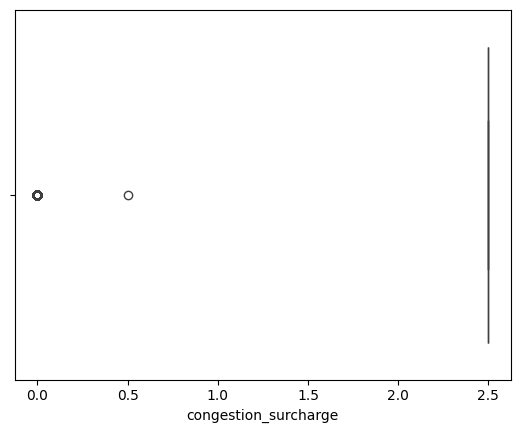

In [43]:
#Boxplot for congestion_surcharge

sns.boxplot(data=df2, x='congestion_surcharge')  
plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [47]:
# remove passenger_count > 6

df2 = df2[df2['passenger_count'] <= 6]


In [58]:
# Continue with outlier handling
df2 = df2[~((df2['trip_distance'] < 0.1) & (df2['fare_amount'] > 300))]


In [53]:
df2 = df2[~((df2['trip_distance'] == 0) & (df2['fare_amount'] == 0) & (df2['tpep_pickup_datetime'] != df2['tpep_dropoff_datetime']))]

In [54]:
df2 = df2[df2['trip_distance'] <= 250]

In [55]:
df2 = df2[df2['payment_type'] != 0]

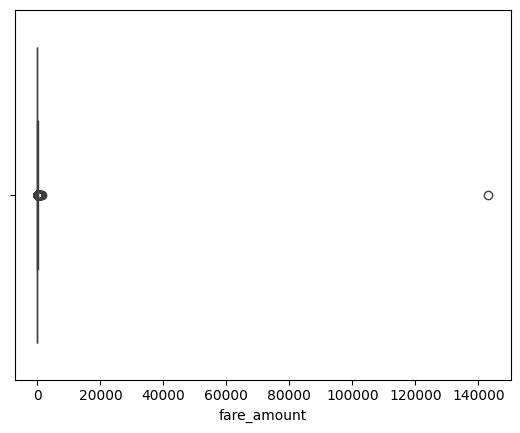

In [56]:
#Boxplot for fare_amount

sns.boxplot(data=df2, x='fare_amount')  
plt.show()

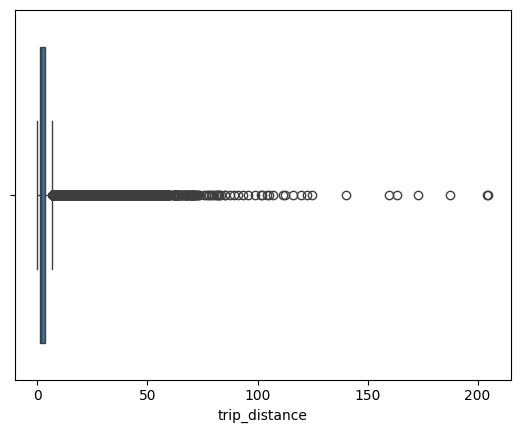

In [157]:
#Boxplot for fare_amount

sns.boxplot(data=df2, x='trip_distance')  
plt.show()

In [59]:
# Do any columns need standardising?

numeric_cols = df2.select_dtypes(include=['int64', 'float64']).columns
print(numeric_cols)



Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'Airport_fee',
       'total_airport_fee'],
      dtype='object')


In [60]:
print(df2[numeric_cols].describe())

           VendorID  passenger_count  trip_distance    RatecodeID  \
count  1.831167e+06     1.831167e+06   1.831167e+06  1.831167e+06   
mean   1.736356e+00     1.385378e+00   3.445259e+00  1.633888e+00   
std    4.406086e-01     8.764315e-01   4.545891e+00  7.390042e+00   
min    1.000000e+00     1.000000e+00   0.000000e+00  1.000000e+00   
25%    1.000000e+00     1.000000e+00   1.050000e+00  1.000000e+00   
50%    2.000000e+00     1.000000e+00   1.790000e+00  1.000000e+00   
75%    2.000000e+00     1.000000e+00   3.370000e+00  1.000000e+00   
max    2.000000e+00     6.000000e+00   2.048600e+02  9.900000e+01   

       PULocationID  DOLocationID  payment_type   fare_amount         extra  \
count  1.831167e+06  1.831167e+06  1.831167e+06  1.831167e+06  1.831167e+06   
mean   1.654595e+02  1.643355e+02  1.204886e+00  1.981909e+01  1.638489e+00   
std    6.367207e+01  6.974091e+01  4.662243e-01  1.073455e+02  1.836147e+00   
min    1.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00 

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [61]:
df2.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'date',
 'hour',
 'Airport_fee',
 'total_airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [62]:
# Numerical columns (int and float)
numerical_cols = df2.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Categorical columns (object and category)
categorical_cols = df2.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee', 'Airport_fee', 'total_airport_fee']
Categorical Columns: ['store_and_fwd_flag', 'date']


##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

    hour  pickup_count
0      0         51162
1      1         34275
2      2         22552
3      3         14708
4      4          9435
5      5         10019
6      6         24465
7      7         48980
8      8         68271
9      9         78279
10    10         85620
11    11         93025
12    12        100981
13    13        104088
14    14        111553
15    15        114285
16    16        114279
17    17        123546
18    18        129178
19    19        115901
20    20        103423
21    21        103161
22    22         95158
23    23         74823


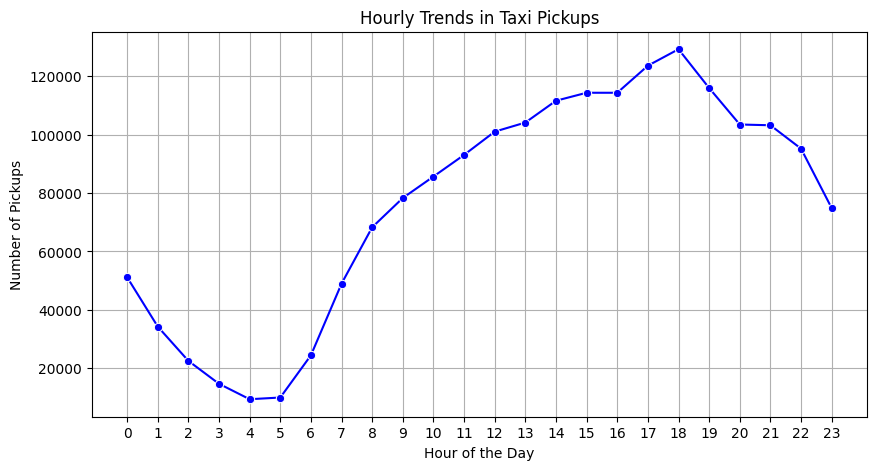

In [64]:
# Find and show the hourly trends in taxi pickups

# Convert to datetime
df2['tpep_pickup_datetime'] = pd.to_datetime(df2['tpep_pickup_datetime'])

# Extract the hour
df2['hour'] = df2['tpep_pickup_datetime'].dt.hour

#Group by hours

hourly_trend = df2.groupby('hour').size().reset_index(name='pickup_count')
print(hourly_trend)

#plot the trend
plt.figure(figsize=(10, 5))
sns.lineplot(data=hourly_trend, x='hour', y='pickup_count', marker='o', color='b')

plt.title("Hourly Trends in Taxi Pickups")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Pickups")
plt.xticks(range(0, 24))  
plt.grid(True)
plt.show()

    day_name  pickup_count
0     Monday        228921
1    Tuesday        265893
2  Wednesday        281536
3   Thursday        287220
4     Friday        271587
5   Saturday        265842
6     Sunday        230168


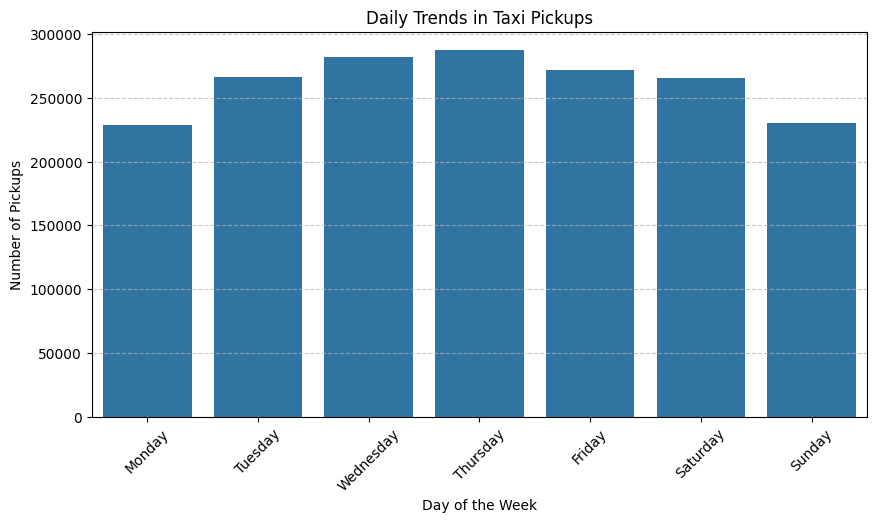

In [ ]:
# Find and show the daily trends in taxi pickups (days of the week)

# Convert to datetime 
df2['tpep_pickup_datetime'] = pd.to_datetime(df2['tpep_pickup_datetime'])

# Extract the day of the week (Monday = 0, Sunday = 6)
df2['day_of_week'] = df2['tpep_pickup_datetime'].dt.dayofweek

# Map numerical values to actual day names
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
             4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df2['day_name'] = df2['day_of_week'].map(day_names)

daily_trend = df2.groupby('day_name').size().reset_index(name='pickup_count')

# Sort by the correct day order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_trend = daily_trend.set_index('day_name').reindex(day_order).reset_index()

print(daily_trend)


plt.figure(figsize=(10, 5))
sns.barplot(data=daily_trend, x='day_name', y='pickup_count')

plt.title("Daily Trends in Taxi Pickups")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Pickups")
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


   month_name  pickup_count
0     January        148444
1    February        140697
2       March        164255
3       April        158352
4         May        168953
5        June        158974
6        July        139705
7      August        135237
8   September        133917
9     October        166507
10   November        158385
11   December        157741


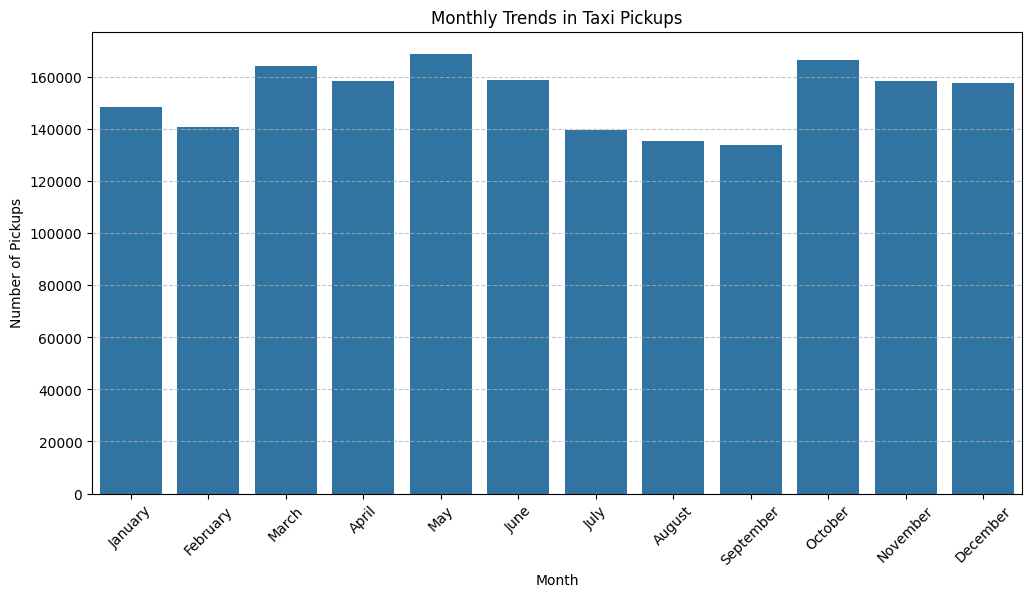

In [70]:
# Show the monthly trends in pickups

# Convert to datetime
df2['tpep_pickup_datetime'] = pd.to_datetime(df2['tpep_pickup_datetime'])

# Extract the month
df2['month'] = df2['tpep_pickup_datetime'].dt.month

# Map month numbers to names
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
df2['month_name'] = df2['month'].map(month_names)

monthly_trend = df2.groupby('month_name').size().reset_index(name='pickup_count')

# Sort months in the correct order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_trend = monthly_trend.set_index('month_name').reindex(month_order).reset_index()

print(monthly_trend)


plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_trend, x='month_name', y='pickup_count')

plt.title("Monthly Trends in Taxi Pickups")
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [72]:
# Analyse the above parameters

columns_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
df2[columns_to_check].describe()



,fare_amount,tip_amount,total_amount,trip_distance
count,1.831167e+06,1.831167e+06,1.831167e+06,1.831167e+06
mean,1.981909e+01,3.573882e+00,2.894361e+01,3.445259e+00
std,1.073455e+02,4.068821e+00,1.082229e+02,4.545891e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.300000e+00,1.000000e+00,1.596000e+01,1.050000e+00
50%,1.350000e+01,2.860000e+00,2.100000e+01,1.790000e+00
75%,2.190000e+01,4.450000e+00,3.070000e+01,3.370000e+00
max,1.431635e+05,2.230800e+02,1.431675e+05,2.048600e+02


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

In [ ]:
#Yes, it would be beneficial to copy DataFrame leaving zero values behind as zero values indicates invalid trips hence if we exclude them we might get data accuracy.

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [77]:
# Create a df with non zero entries for the selected parameters.

df_zero_dist = df2[df2['trip_distance'] == 0]
print(df_zero_dist[['fare_amount', 'tip_amount', 'total_amount']].describe())



        fare_amount    tip_amount  total_amount
count  22704.000000  22704.000000  22704.000000
mean      28.249227      3.075139     35.324762
std       34.848287      7.526551     38.780337
min        0.000000      0.000000      0.000000
25%        3.000000      0.000000      7.700000
50%       13.500000      0.000000     19.300000
75%       43.500000      2.940000     51.000000
max      300.000000    201.000000    402.000000


In [ ]:
#creating a new dataframe

df3=df2[df2['trip_distance']>0].copy()
print(df3)

#if fare_amount along with trip_distance is zero the its a invalid trip. if trip_distance is zero as pickup and drop might be in same location then fare_amount must have some amount.
#I have created a dataframe which excludes the trip_distance<=0 and fare_amount=0

df_zero_dist = df2[df2['trip_distance'] == 0]
print(df_zero_dist[['fare_amount', 'tip_amount', 'total_amount']].describe())

         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1               2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2               2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3               2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
5               1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   
...           ...                  ...                   ...              ...   
1896395         2  2023-09-30 23:46:34   2023-09-30 23:53:20              1.0   
1896396         1  2023-09-30 23:44:51   2023-09-30 23:49:05              3.0   
1896397         2  2023-09-30 23:11:05   2023-09-30 23:18:42              1.0   
1896398         1  2023-09-30 23:26:31   2023-10-01 00:04:05              2.0   
1896399         2  2023-09-30 23:19:47   2023-09-30 23:33:36              1.0   

         trip_distance  Rat

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

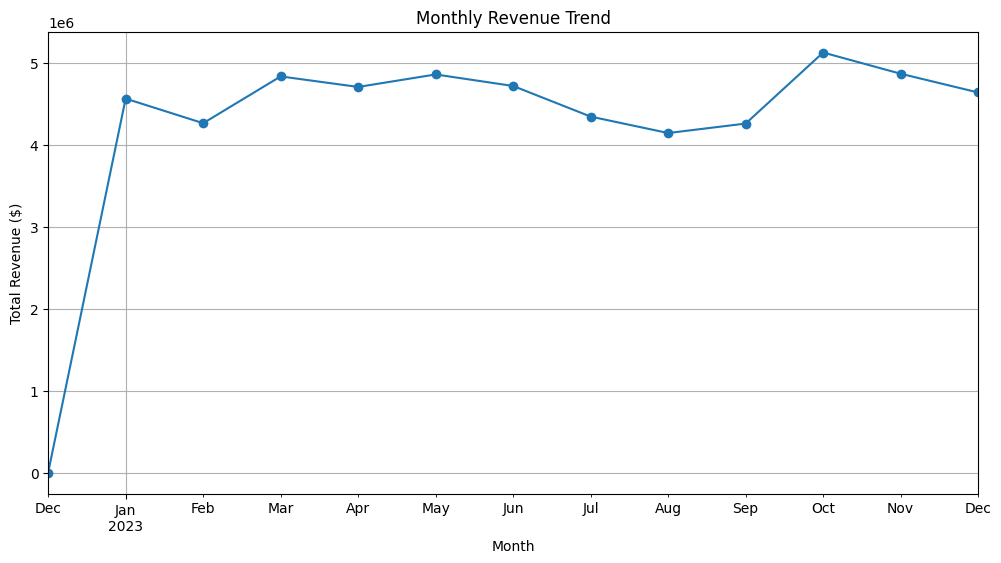

In [89]:
# Group data by month and analyse monthly revenue


# Ensure pickup_datetime is in datetime format
df['pickup_datetime'] = pd.to_datetime(df2['tpep_pickup_datetime'])

# Extract Year-Month
df['year_month'] = df['pickup_datetime'] .dt.to_period('M')

# Aggregate revenue per month
monthly_revenue = df.groupby('year_month')['total_amount'].sum()

# Plot the trend
plt.figure(figsize=(12, 6))
monthly_revenue.plot(marker='o', linestyle='-')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.grid(True)
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [90]:
# Calculate proportion of each quarter

# Ensure 'pickup_datetime' is in datetime format
df['pickup_datetime'] = pd.to_datetime(df2['tpep_pickup_datetime'])

# Extract Year and Quarter
df['year_quarter'] = df['pickup_datetime'].dt.to_period('Q')

# Aggregate revenue per quarter
quarterly_revenue = df.groupby('year_quarter')['total_amount'].sum()

# Compute the proportion of each quarter
quarterly_proportion = (quarterly_revenue / quarterly_revenue.sum()) * 100

# Display results
print(quarterly_proportion)



year_quarter
2022Q4     0.000067
2023Q1    24.694513
2023Q2    25.816265
2023Q3    23.040803
2023Q4    26.448352
Freq: Q-DEC, Name: total_amount, dtype: float64


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

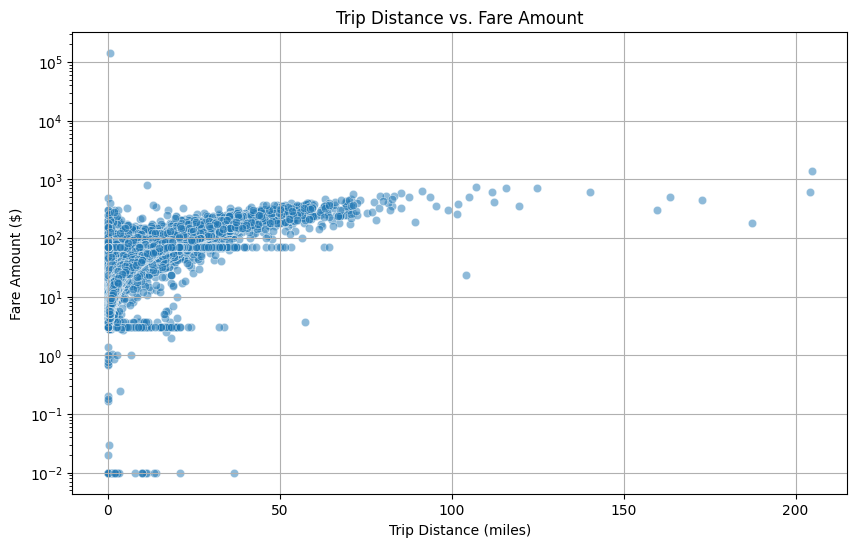

Correlation between Trip Distance and Fare Amount: 0.1564


In [93]:
# Show how trip fare is affected by distance

# Remove negative or zero values
df_filtered = df3[(df3['trip_distance'] > 0) & (df3['fare_amount'] > 0)]

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x="trip_distance", y="fare_amount", alpha=0.5)

# Apply log scale
plt.yscale("log")

# Labels and title
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.title("Trip Distance vs. Fare Amount")
plt.grid(True)
plt.show()

# Calculate correlation
correlation_value = df_filtered['trip_distance'].corr(df_filtered['fare_amount'])
print(f"Correlation between Trip Distance and Fare Amount: {correlation_value:.4f}")

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

Correlation between Trip Duration and Fare Amount: -0.0002


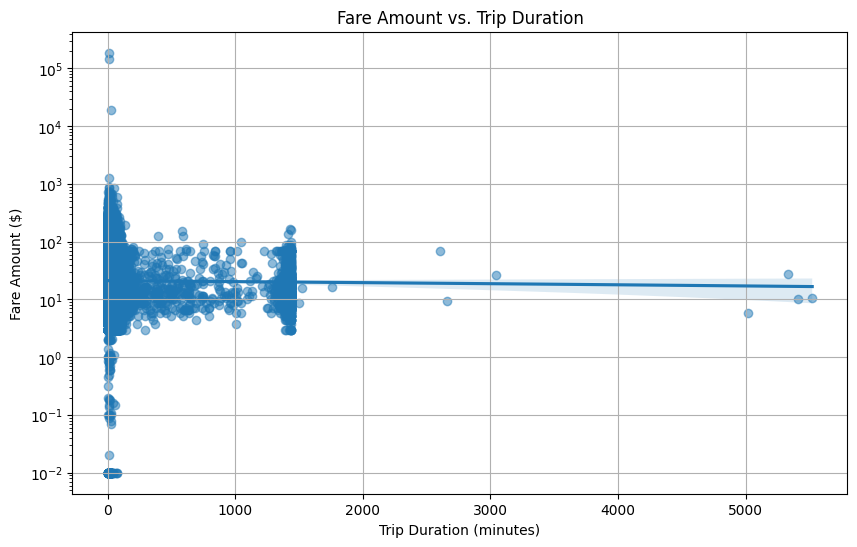

In [101]:
# Show relationship between fare and trip duration


# Ensure datetime columns are in proper format
df['pickup_datetime'] = pd.to_datetime(df3['tpep_pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df3['tpep_dropoff_datetime'])

# Compute trip duration in minutes
df['trip_duration'] = (df['dropoff_datetime'] - df['pickup_datetime']).dt.total_seconds() / 60  # in minutes

# Remove negative/zero durations if any
df_filtered = df[df['trip_duration'] > 0]

# Compute correlation values
correlations =df_filtered['fare_amount'].corr(df_filtered['trip_duration'])

print(f"Correlation between Trip Duration and Fare Amount: {correlations:.4f}")


# Scatter plot with trend line
plt.figure(figsize=(10, 6))
sns.regplot(data=df_filtered, x='trip_duration', y='fare_amount', scatter_kws={'alpha': 0.5})

# Apply log scale
plt.yscale("log")

# Labels and title
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Fare Amount ($)")
plt.title("Fare Amount vs. Trip Duration")
plt.grid(True)
plt.show()

Correlation between Passenger Count and Fare Amount: 0.0067


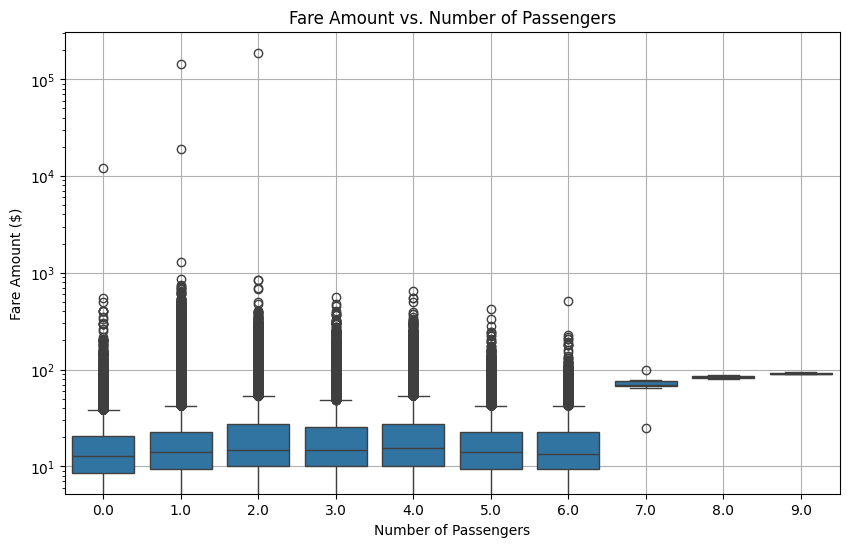

In [106]:
# Show relationship between fare and number of passengers

# Compute correlation values
correlations =df3['fare_amount'].corr(df3['passenger_count'])

print(f"Correlation between Passenger Count and Fare Amount: {correlations:.4f}")


# Box plot of fare amount by passenger count
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='passenger_count', y='fare_amount')

# Apply log scale
plt.yscale("log")

# Labels and title
plt.xlabel("Number of Passengers")
plt.ylabel("Fare Amount ($)")
plt.title("Fare Amount vs. Number of Passengers")
plt.grid(True)
plt.show()



Correlation between Tip Amount and Trip Distance: 0.5722


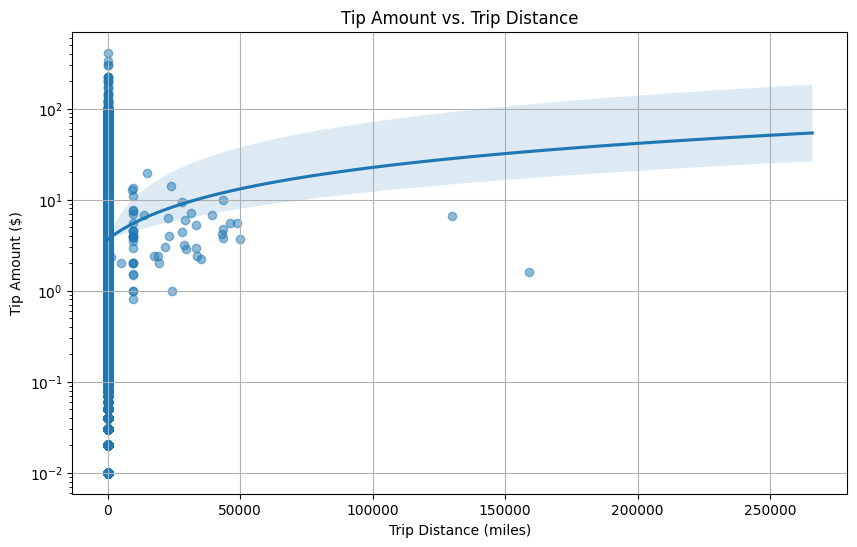

In [108]:
# Show relationship between tip and trip distance

# Compute correlation
tip_distance_corr = df2['tip_amount'].corr(df2['trip_distance'])

# Print the result
print(f"Correlation between Tip Amount and Trip Distance: {tip_distance_corr:.4f}")


# Scatter plot with trend line
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='trip_distance', y='tip_amount', scatter_kws={'alpha': 0.5})

# Apply log scale
plt.yscale("log")

# Labels and title
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Tip Amount ($)")
plt.title("Tip Amount vs. Trip Distance")
plt.grid(True)
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

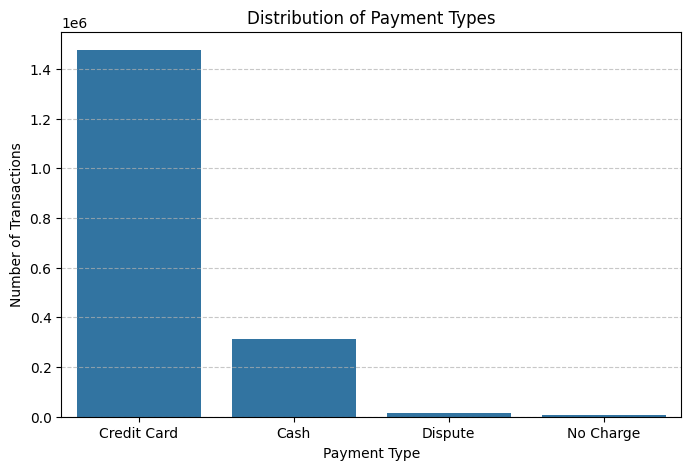

payment_type
Credit Card    1475983
Cash            312858
Dispute          13494
No Charge         8856
Name: count, dtype: int64


In [114]:
# Analyse the distribution of different payment types (payment_type).

# Define mapping of payment type codes to labels
payment_mapping = {
    1: "Credit Card",
    2: "Cash",
    3: "No Charge",
    4: "Dispute"
}

# Replace numerical payment types with actual names
df['payment_type'] = df2['payment_type'].map(payment_mapping)


# Count occurrences of each payment type
payment_counts = df['payment_type'].value_counts()

# Bar plot for payment type distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=payment_counts.index, y=payment_counts.values)

# Labels and title
plt.xlabel("Payment Type")
plt.ylabel("Number of Transactions")
plt.title("Distribution of Payment Types")
plt.xticks(rotation=0)  # Keep labels readable
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print raw counts
print(payment_counts)

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [117]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [119]:
# import geopandas as gpd

import geopandas as gpd
# Read the shapefile using geopandas
zones =gpd.read_file(r"C:\Users\Vedan\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\taxi_zones\taxi_zones.shp")
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

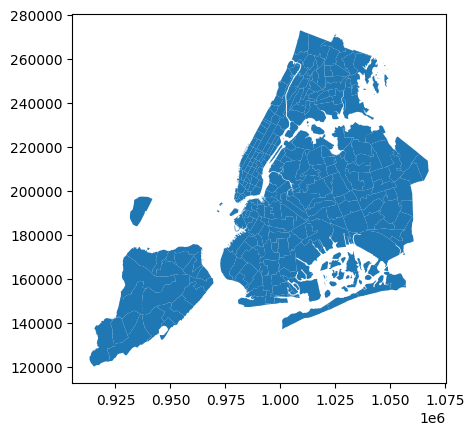

In [121]:
# print(zones.info())
# zones.plot()

print(zones.info())

zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [123]:
# Merge zones and trip records using locationID and PULocationID


df_merged = df2.merge(zones, left_on='PULocationID', right_on='LocationID', how='left')

# Display the first few rows of merged data
print(df_merged.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4           7.10         1.0                  N           246            37   

   payment_type  ...  day_name  month  month_name  OBJECTID  Shape_Leng  \

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [124]:
# Group data by location and calculate the number of trips

trip_counts = df2.groupby('PULocationID').size().reset_index(name='trip_count')

# Sort by the number of trips (descending order)
trip_counts = trip_counts.sort_values(by='trip_count', ascending=False)

# Display the top locations with highest trips
print(trip_counts.head())

     PULocationID  trip_count
125           132       96803
229           237       86904
154           161       85946
228           236       77516
155           162       65634


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [125]:
# Merge trip counts back to the zones GeoDataFrame

# Step 1: Group trip data by PULocationID and count trips
trip_counts = df2.groupby('PULocationID').size().reset_index(name='trip_count')

# Step 2: Merge trip counts back to the zones GeoDataFrame
zones_merged = zones.merge(trip_counts, left_on='LocationID', right_on='PULocationID', how='left')

# Fill NaN values (for locations with no trips) with 0
zones_merged['trip_count'] = zones_merged['trip_count'].fillna(0)

# Display the first few rows
print(zones_merged.head())


   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   PULocationID  trip_count  
0           1.0       213.0  
1           2.0         2.0  
2           3.0        40.

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

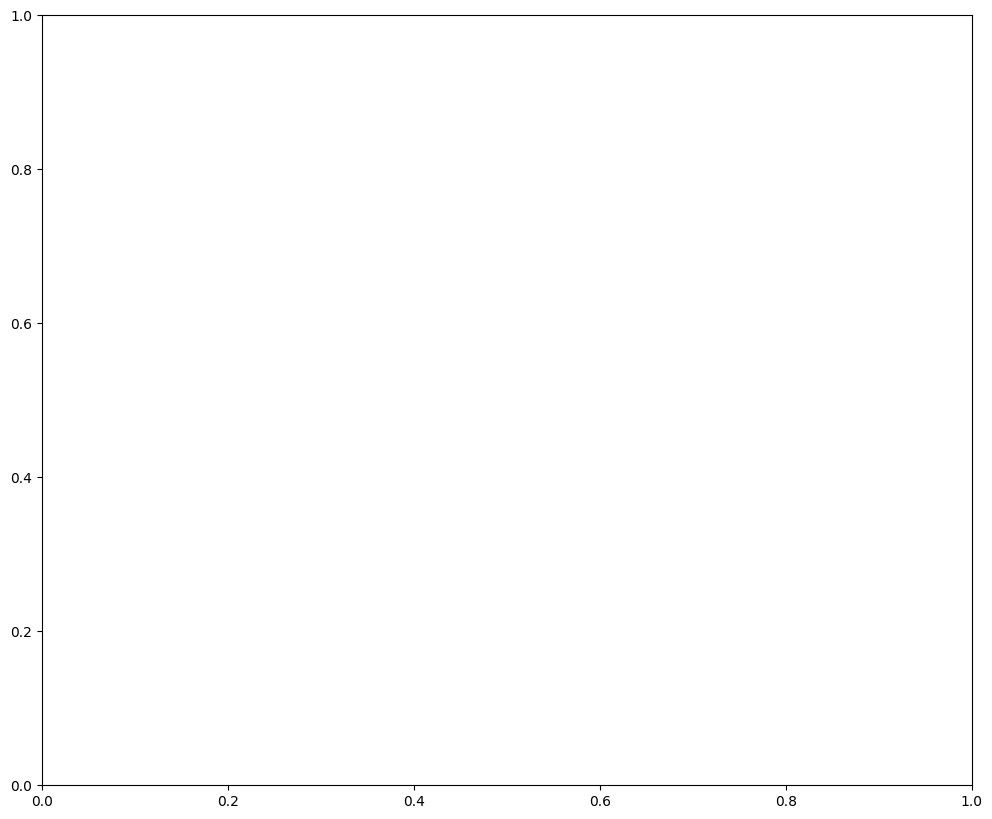

In [128]:
# Define figure and axis

fig, ax = plt.subplots(figsize=(12, 10)) 

# Customize the plot (e.g., title, labels)
column='',
ax=ax,
legend=True,
legend_kwds={'label':"label",'orientation':"<horizontal/vertical>"}


# Plot the map and display it

plt.show()

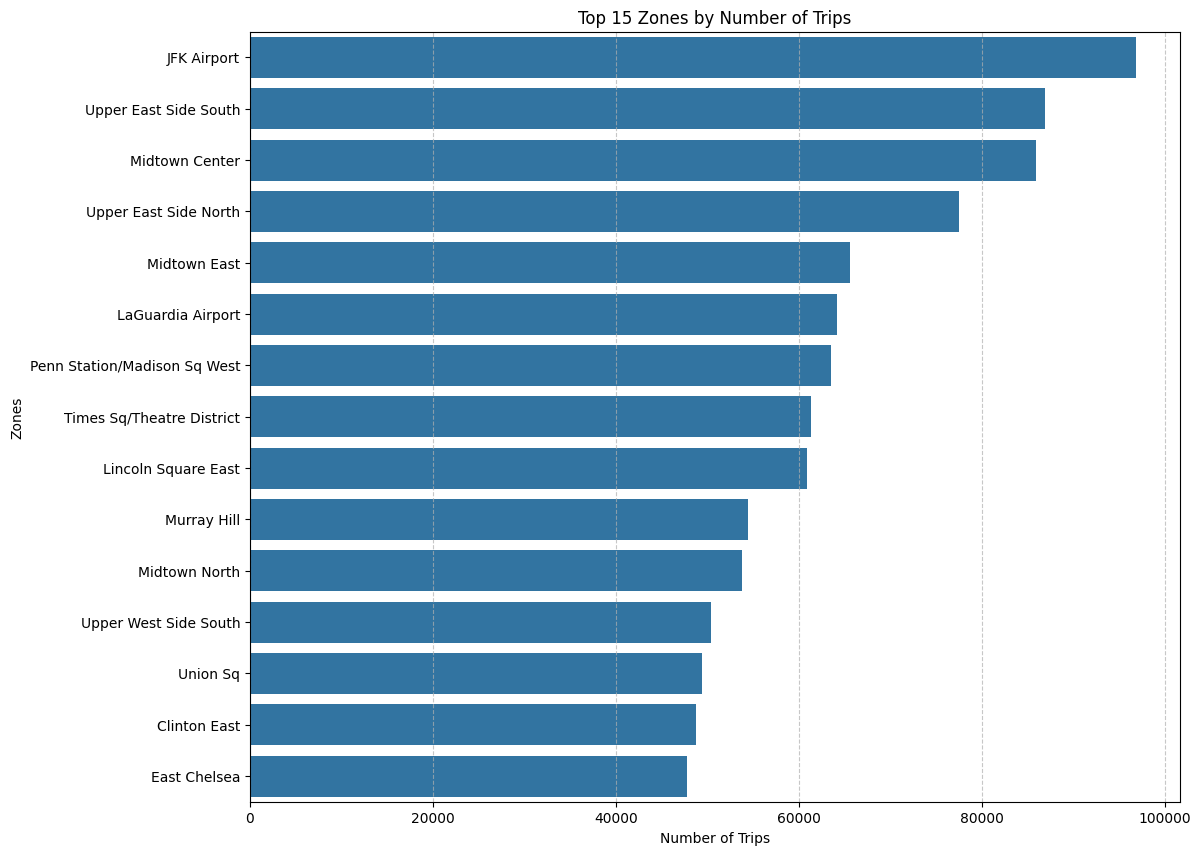

In [137]:
# can you try displaying the zones DF sorted by the number of trips?

# Sort zones by trip count in descending order
zones_sorted = zones_merged.sort_values(by='trip_count', ascending=False).head(15)  # Show top 15 zones

# Define figure and axis
plt.figure(figsize=(12, 10))
sns.barplot(data=zones_sorted, x='trip_count', y=zones['zone'],  order=zones_sorted['zone'])

# Customize the plot
plt.xlabel("Number of Trips")
plt.ylabel("Zones")
plt.title("Top 15 Zones by Number of Trips")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


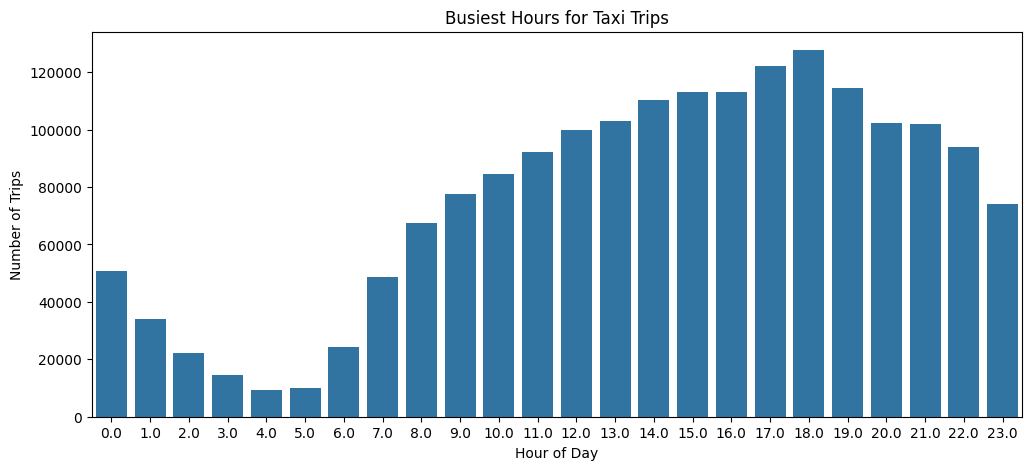

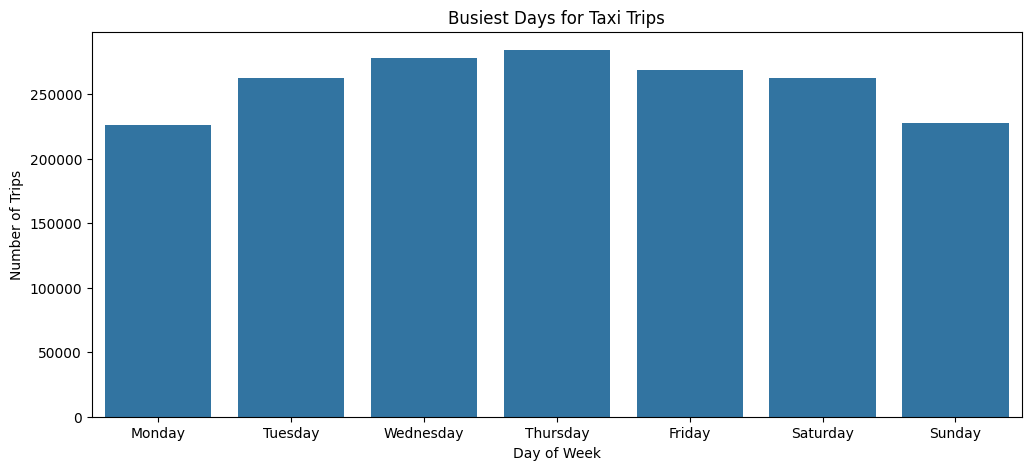

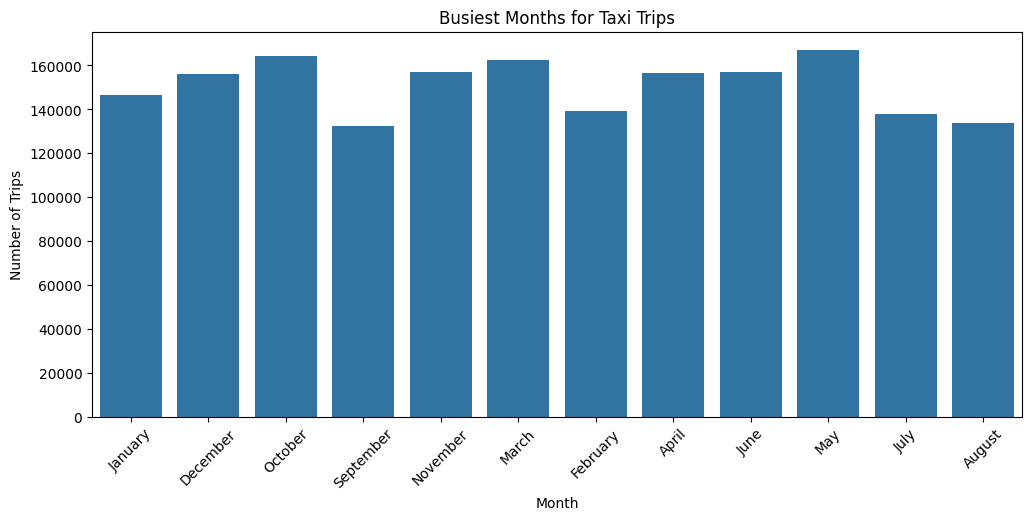

In [138]:
##Busiest Hours, Days and Months

# Convert pickup datetime to datetime format
df['pickup_datetime'] = pd.to_datetime(df2['tpep_pickup_datetime'])

# Extract hour, day, and month
df['hour'] = df['pickup_datetime'].dt.hour
df['day_of_week'] = df['pickup_datetime'].dt.day_name()
df['month'] = df['pickup_datetime'].dt.month_name()

# Plot busiest hours
plt.figure(figsize=(12, 5))
sns.countplot(x=df['hour'])
plt.title("Busiest Hours for Taxi Trips")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.show()

# Plot busiest days
plt.figure(figsize=(12, 5))
sns.countplot(x=df['day_of_week'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Busiest Days for Taxi Trips")
plt.xlabel("Day of Week")
plt.ylabel("Number of Trips")
plt.show()

# Plot busiest months
plt.figure(figsize=(12, 5))
sns.countplot(x=df['month'])
plt.title("Busiest Months for Taxi Trips")
plt.xlabel("Month")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45)
plt.show()

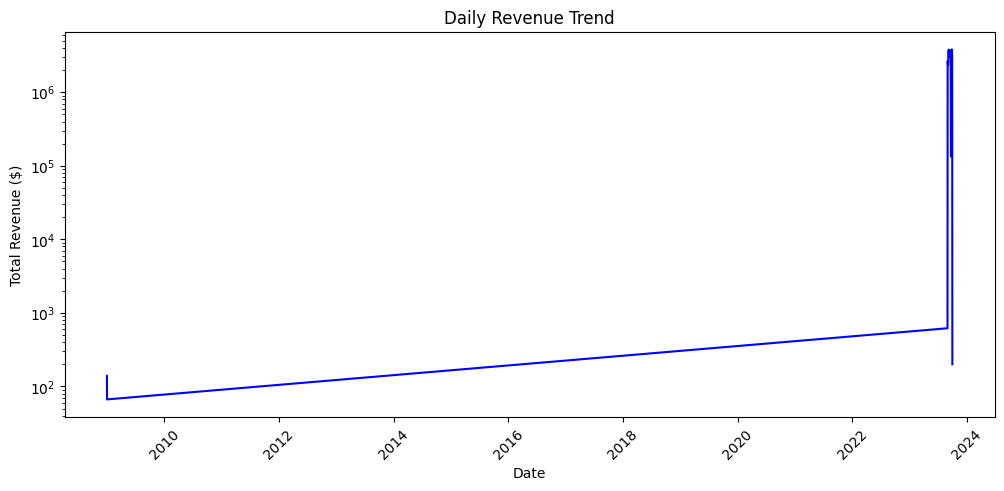

In [140]:
#Trend in revenue collected

# Extract date
df['date'] = df['tpep_pickup_datetime'].dt.date

# Group by date and sum total revenue
daily_revenue = df.groupby('date')['total_amount'].sum().reset_index()

# Plot revenue trends
plt.figure(figsize=(12, 5))
sns.lineplot(data=daily_revenue, x='date', y='total_amount', color='blue')

# Apply log scale
plt.yscale("log")


plt.title("Daily Revenue Trend")
plt.xlabel("Date")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45)
plt.show()

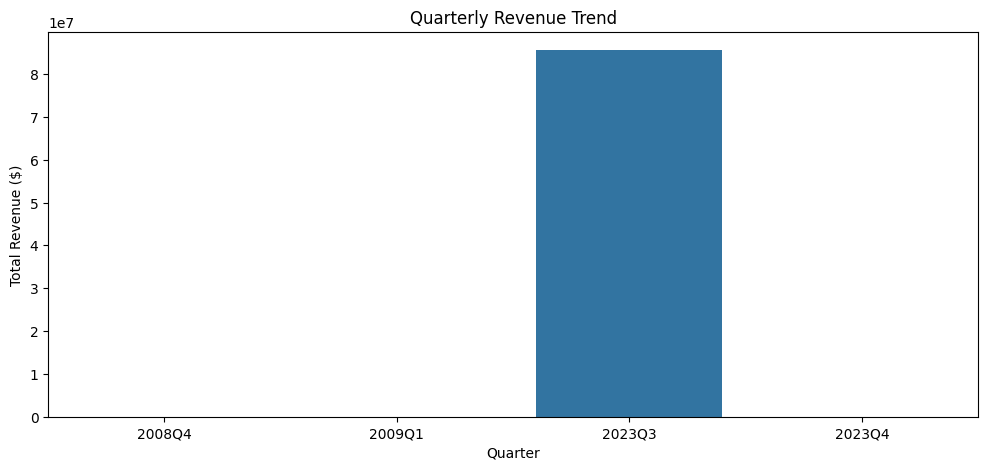

In [141]:
#Trends in quarterly revenue

# Extract quarter
df['quarter'] = df['tpep_pickup_datetime'].dt.to_period('Q')

# Group by quarter
quarterly_revenue = df.groupby('quarter')['total_amount'].sum().reset_index()

# Plot revenue per quarter
plt.figure(figsize=(12, 5))
sns.barplot(data=quarterly_revenue, x='quarter', y='total_amount')
plt.title("Quarterly Revenue Trend")
plt.xlabel("Quarter")
plt.ylabel("Total Revenue ($)")
plt.show()

Correlation between Fare & Trip Distance: 0.1548
Correlation between Fare & Trip Duration: 0.0445
Correlation between Fare & Passenger Count: 0.0072


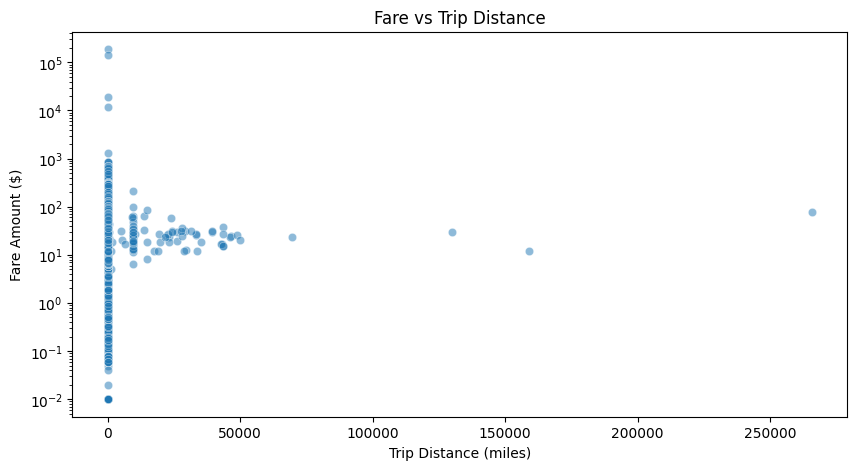

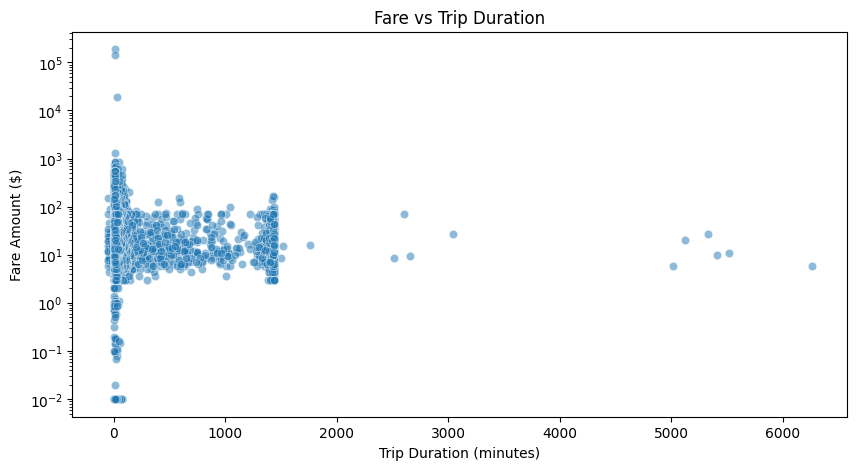

In [146]:
#How fare depends on trip distance, trip duration and passenger counts

# Calculate trip duration in minutes
df['trip_duration'] = (df2['tpep_dropoff_datetime'] - df2['tpep_pickup_datetime']).dt.total_seconds() / 60

# Correlation between fare and trip details


trip_distance_corr = df2['fare_amount'].corr(df2['trip_distance'])
trip_duration_corr= df2['fare_amount'].corr(df['trip_duration'])
passenger_count_corr=df2['fare_amount'].corr(df2['passenger_count'])

# Print the result
print(f"Correlation between Fare & Trip Distance: {trip_distance_corr:.4f}")
print(f"Correlation between Fare & Trip Duration: {trip_duration_corr:.4f}")
print(f"Correlation between Fare & Passenger Count: {passenger_count_corr:.4f}")


# Visualization: Fare vs Trip Distance
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='trip_distance', y='fare_amount', alpha=0.5)

# Apply log scale
plt.yscale("log")

plt.title("Fare vs Trip Distance")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.show()

# Visualization: Fare vs Trip Duration
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='trip_duration', y='fare_amount', alpha=0.5)

# Apply log scale
plt.yscale("log")

plt.title("Fare vs Trip Duration")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Fare Amount ($)")
plt.show()

Correlation between Tip & Trip Distance: 0.5722


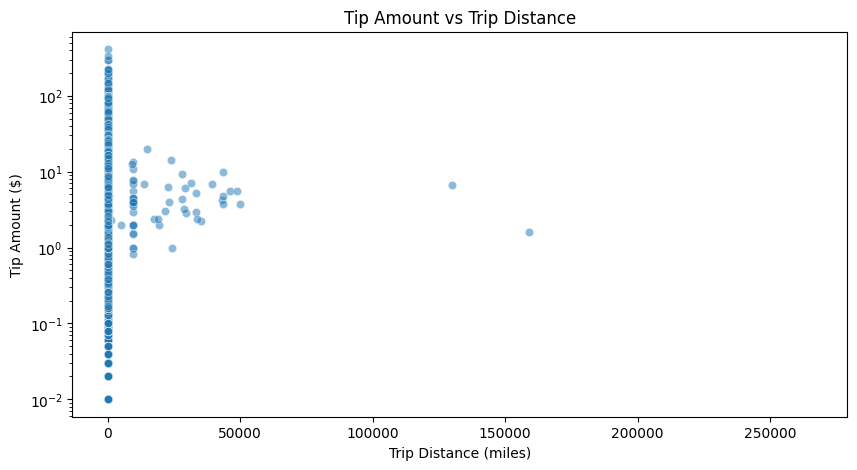

In [150]:
#How Tip Amount Depends on Trip Distance

trip_distance_corr=df2['tip_amount'].corr(df2['trip_distance'])
# Correlation between tip amount and trip distance
print(f"Correlation between Tip & Trip Distance: {trip_distance_corr:.4f}")

# Visualization: Tip vs Trip Distance
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='trip_distance', y='tip_amount', alpha=0.5)

# Apply log scale
plt.yscale("log")

plt.title("Tip Amount vs Trip Distance")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Tip Amount ($)")
plt.show()

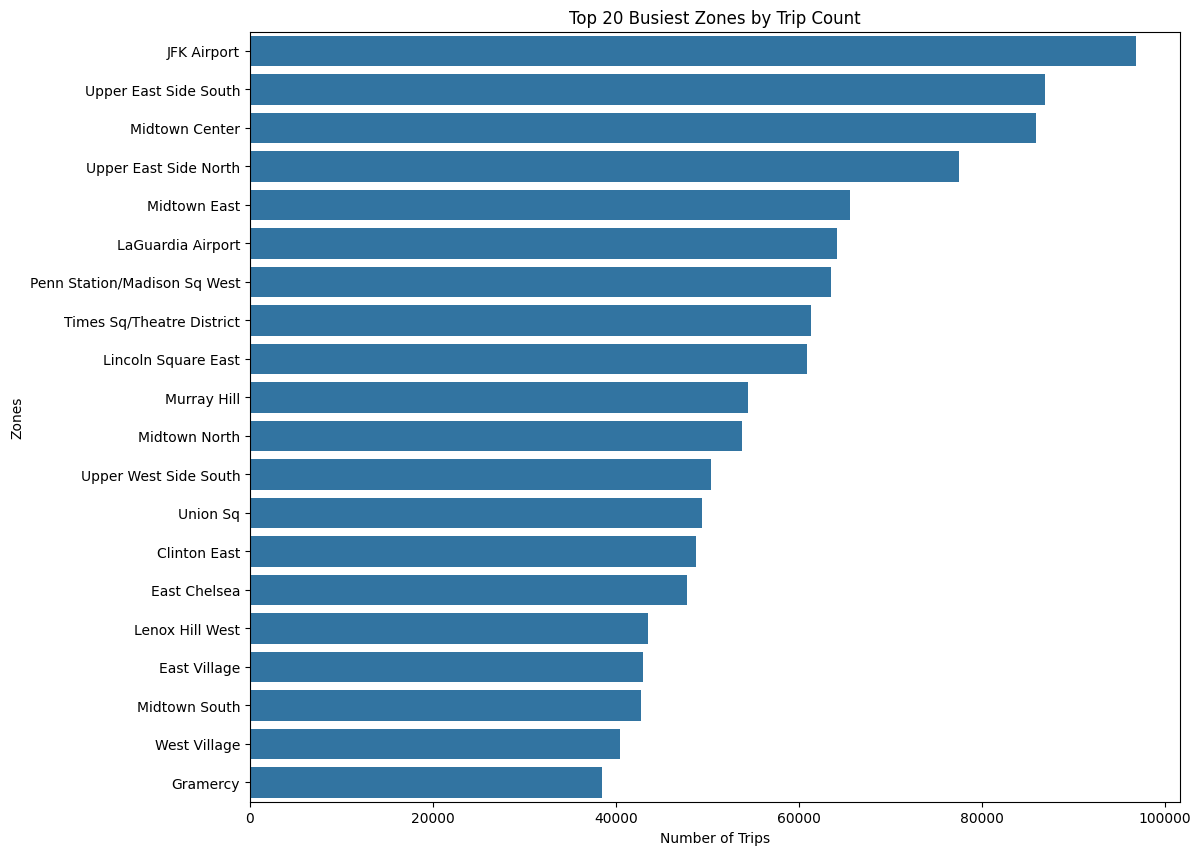

In [156]:
#Busiest Zone


# Group by pickup location and count trips
zone_trip_counts = df2.groupby('PULocationID').size().reset_index(name='trip_count')

# Merge trip counts with the zones data
zones_merged = zones.merge(zone_trip_counts, left_on='LocationID', right_on='PULocationID', how='left')

# Fill NaN trip counts with 0
zones_merged['trip_count'] = zones_merged['trip_count'].fillna(0)

# Sort by busiest zones
zones_sorted = zones_merged.sort_values(by='trip_count', ascending=False).head(20)


# Ensure the 'Zone' column exists
if 'Zone' in zones_sorted.columns:
    y_column = 'Zone'
elif 'Borough' in zones_sorted.columns:
    y_column = 'Borough'
else:
    y_column = 'LocationID'  # Fallback option
    
# Bar plot for busiest zones
plt.figure(figsize=(12, 10))
sns.barplot(data=zones_sorted, x='trip_count', y='zone',  order=zones_sorted['zone'])


plt.title("Top 20 Busiest Zones by Trip Count")
plt.xlabel("Number of Trips")
plt.ylabel("Zones")
plt.show()

#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [158]:
# Find routes which have the slowest speeds at different times of the day

# Convert pickup and dropoff times to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df2['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df2['tpep_dropoff_datetime'])

# Calculate trip duration in hours
df['trip_duration_hours'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 3600

# Avoid division by zero
df = df[df['trip_duration_hours'] > 0]

# Calculate speed (miles per hour)
df['speed_mph'] = df2['trip_distance'] / df['trip_duration_hours']

# Categorize time of day
bins = [0, 6, 12, 18, 24]  # Night (0-6), Morning (6-12), Afternoon (12-18), Evening (18-24)
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
df['time_of_day'] = pd.cut(df['tpep_pickup_datetime'].dt.hour, bins=bins, labels=labels, right=False)

# Group by route and time of day, then find slowest speeds

slowest_routes = df.groupby(['PULocationID', 'DOLocationID', 'time_of_day'], observed=True)['speed_mph'].mean().reset_index()
# Sort by slowest speeds
slowest_routes = slowest_routes.sort_values(by=['time_of_day', 'speed_mph'])

# Display slowest routes
print(slowest_routes.head(10))  # Show top 10 slowest routes


       PULocationID  DOLocationID time_of_day  speed_mph
620              10             1       Night        0.0
717              10           137       Night        0.0
1424             13           195       Night        0.0
3870             41           205       Night        0.0
6998             56           230       Night        0.0
7276             62            39       Night        0.0
8310             68           130       Night        0.0
8737             69           232       Night        0.0
10085            75            13       Night        0.0
11620            80           255       Night        0.0


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

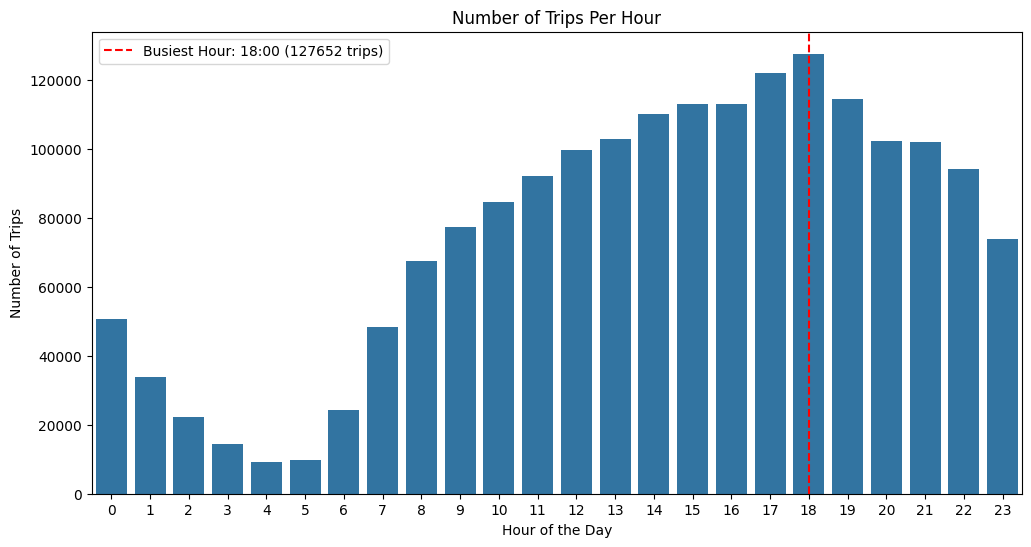

The busiest hour is 18:00 with 127652 trips.


In [162]:
# Visualise the number of trips per hour and find the busiest hour

# Convert pickup datetime to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df2['tpep_pickup_datetime'])

# Extract hour
df['hour'] = df2['tpep_pickup_datetime'].dt.hour

# Count trips per hour
trips_per_hour = df['hour'].value_counts().sort_index()

# Identify the busiest hour
busiest_hour = trips_per_hour.idxmax()
max_trips = trips_per_hour.max()

# Plot the number of trips per hour
plt.figure(figsize=(12, 6))
sns.barplot(x=trips_per_hour.index, y=trips_per_hour.values)

# Highlight busiest hour
plt.axvline(busiest_hour, color='red', linestyle='--', label=f'Busiest Hour: {busiest_hour}:00 ({max_trips} trips)')

# Labels and title
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Number of Trips Per Hour")
plt.xticks(range(0, 24))
plt.legend()
plt.show()

# Print the busiest hour
print(f"The busiest hour is {busiest_hour}:00 with {max_trips} trips.")



Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [165]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers

# Define your sampling fraction 
sampling_fraction = 0.1 #Taking 10% for sampling

# Scale up the number of trips

df['scaled_revenue'] = df2['total_amount'] / sampling_fraction 
df['scaled_distance'] = df2['trip_distance'] / sampling_fraction  

# Display the first few rows
print(df[[ 'scaled_revenue', 'scaled_distance']].head())

# Print total scaled values
total_scaled_revenue = df['scaled_revenue'].sum()
total_scaled_distance = df['scaled_distance'].sum()


print(f"Total Scaled Revenue: ${total_scaled_revenue:,.2f}")
print(f"Total Scaled Distance: {total_scaled_distance:,.2f} miles")




   scaled_revenue  scaled_distance
0           411.5             77.4
1           154.8             12.4
2           164.0             14.4
3           115.0              5.4
5           474.0             71.0
Total Scaled Revenue: $524,044,159.10
Total Scaled Distance: 62,398,849.60 miles


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

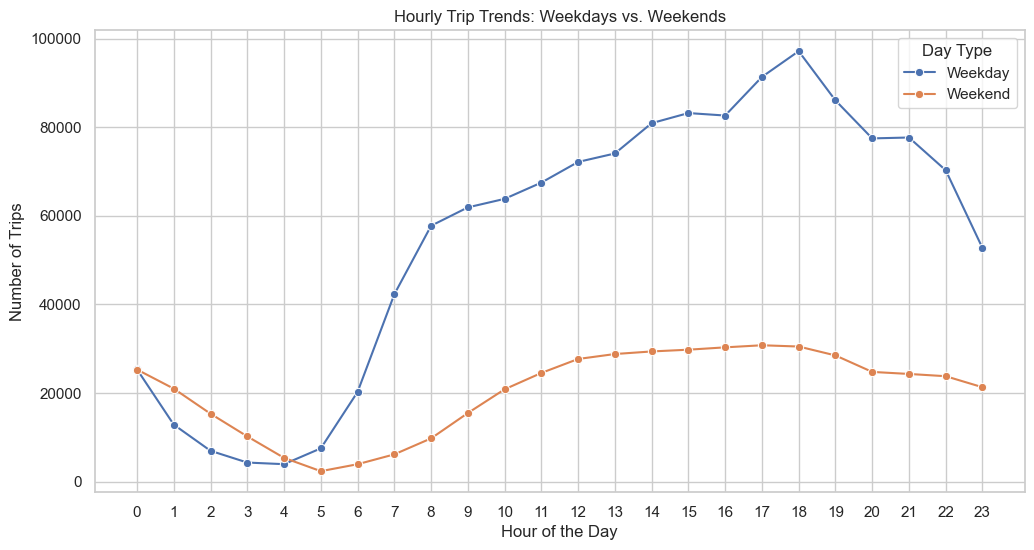

In [167]:
# Compare traffic trends for the week days and weekends

# Ensure datetime conversion
df['tpep_pickup_datetime'] = pd.to_datetime(df2['tpep_pickup_datetime'])

# Extract hour and day of the week
df['hour'] = df['tpep_pickup_datetime'].dt.hour
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6

# Define weekday vs weekend
df['day_type'] = df['day_of_week'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

# Aggregate trip counts per hour
trips_per_hour = df.groupby(['day_type', 'hour']).size().reset_index(name='trip_count')

# Plot
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

sns.lineplot(data=trips_per_hour, x='hour', y='trip_count', hue='day_type', marker="o")

# Labels and title
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Hourly Trip Trends: Weekdays vs. Weekends")
plt.xticks(range(0, 24))
plt.legend(title="Day Type")
plt.show()



What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

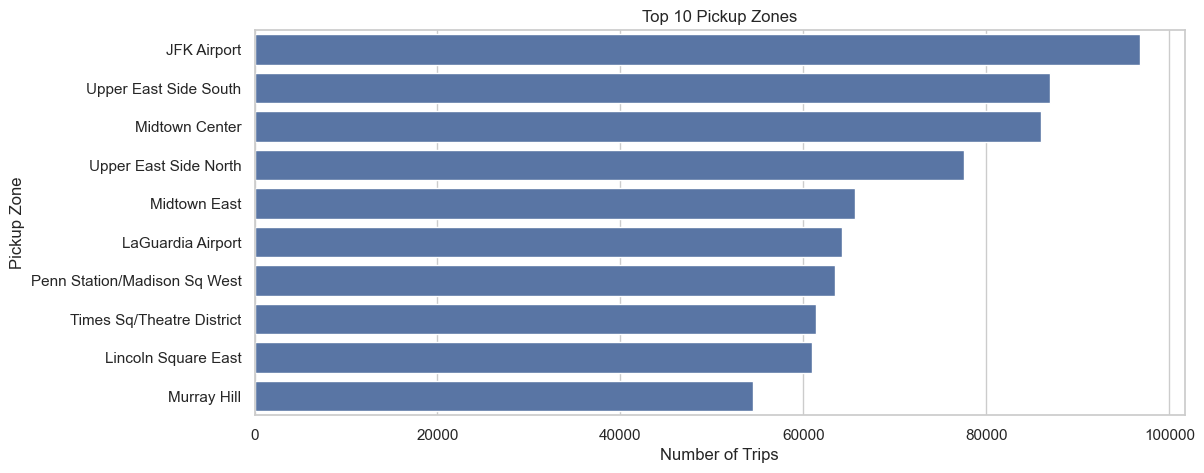

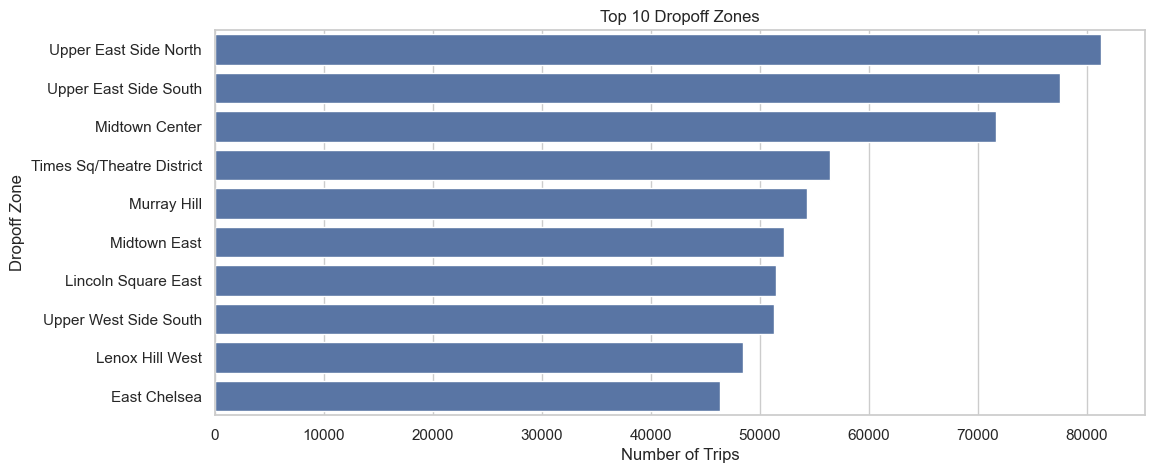

In [169]:
# Find top 10 pickup and dropoff zones


# Step 1: Count top 10 pickup zones
top_pickup_zones = df2['PULocationID'].value_counts().head(10).reset_index()
top_pickup_zones.columns = ['LocationID', 'trip_count']

# Step 2: Count top 10 dropoff zones
top_dropoff_zones = df2['DOLocationID'].value_counts().head(10).reset_index()
top_dropoff_zones.columns = ['LocationID', 'trip_count']

# Step 3: Merge with zone names (if available)
if 'zone' in zones.columns:  # Assuming 'zones' has a mapping of LocationID to zone names
    top_pickup_zones = top_pickup_zones.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')
    top_dropoff_zones = top_dropoff_zones.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')

# Step 4: Plot Top 10 Pickup Zones
plt.figure(figsize=(12, 5))
sns.barplot(x=top_pickup_zones['trip_count'], y=top_pickup_zones['zone'])
plt.xlabel("Number of Trips")
plt.ylabel("Pickup Zone")
plt.title("Top 10 Pickup Zones")
plt.show()

# Step 5: Plot Top 10 Dropoff Zones
plt.figure(figsize=(12, 5))
sns.barplot(x=top_dropoff_zones['trip_count'], y=top_dropoff_zones['zone'])
plt.xlabel("Number of Trips")
plt.ylabel("Dropoff Zone")
plt.title("Top 10 Dropoff Zones")
plt.show()



**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

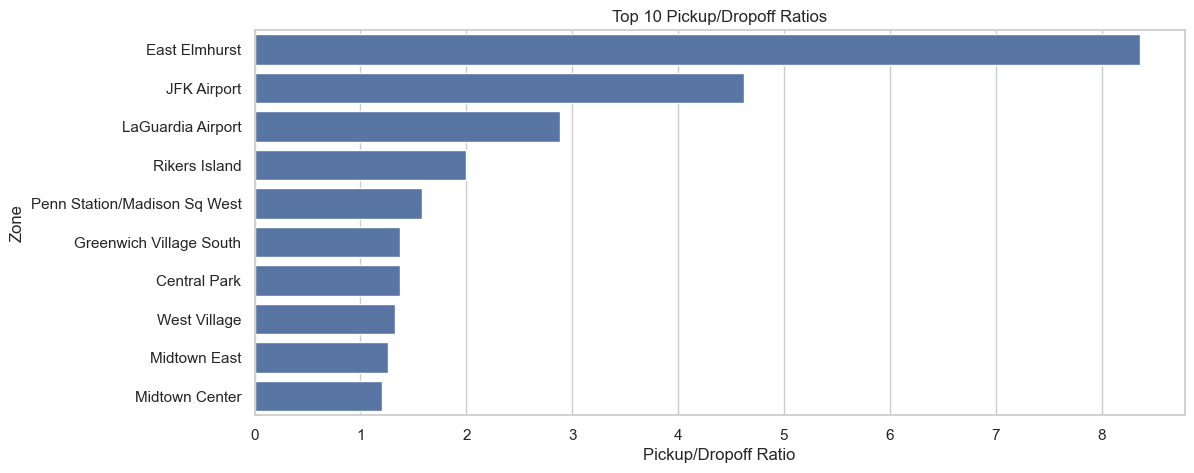

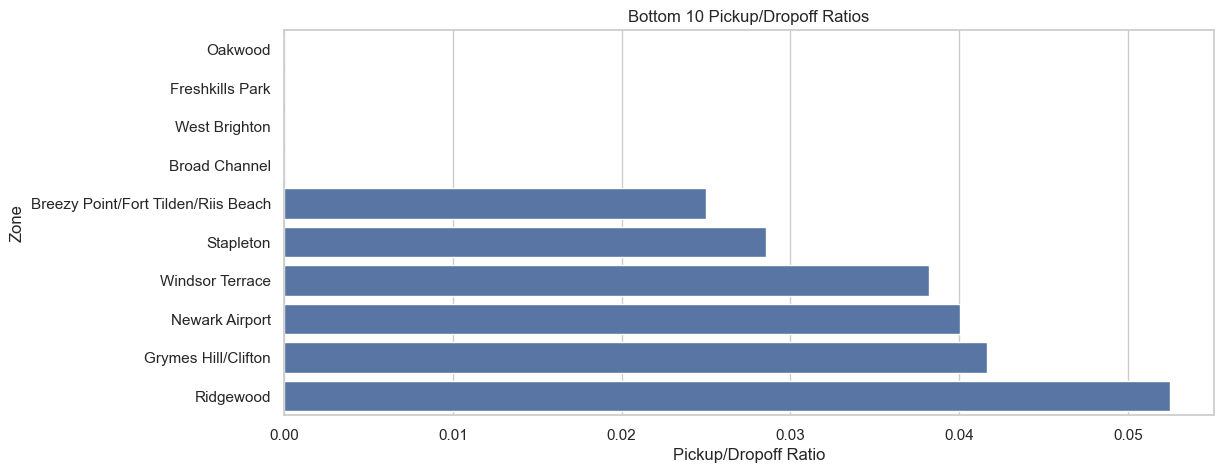

In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# Step 1: Count total pickups and dropoffs
pickup_counts = df2['PULocationID'].value_counts().reset_index()
pickup_counts.columns = ['LocationID', 'pickup_count']

dropoff_counts = df2['DOLocationID'].value_counts().reset_index()
dropoff_counts.columns = ['LocationID', 'dropoff_count']

# Step 2: Merge pickup and dropoff counts
zone_ratios = pickup_counts.merge(dropoff_counts, on='LocationID', how='outer').fillna(0)

# Step 3: Compute the pickup/dropoff ratio
zone_ratios['pickup_dropoff_ratio'] = zone_ratios['pickup_count'] / (zone_ratios['dropoff_count'] + 1)  # Avoid division by zero

# Step 4: Merge with zone names 
if 'zone' in zones.columns:  
    zone_ratios = zone_ratios.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')

# Step 5: Sort and extract top/bottom 10
top_10_ratios = zone_ratios.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)
bottom_10_ratios = zone_ratios.sort_values(by='pickup_dropoff_ratio', ascending=True).head(10)

# Step 6: Plot the Top 10 Ratios
plt.figure(figsize=(12, 5))
sns.barplot(x=top_10_ratios['pickup_dropoff_ratio'], y=top_10_ratios['zone'])
plt.xlabel("Pickup/Dropoff Ratio")
plt.ylabel("Zone")
plt.title("Top 10 Pickup/Dropoff Ratios")
plt.show()

# Step 7: Plot the Bottom 10 Ratios
plt.figure(figsize=(12, 5))
sns.barplot(x=bottom_10_ratios['pickup_dropoff_ratio'], y=bottom_10_ratios['zone'])
plt.xlabel("Pickup/Dropoff Ratio")
plt.ylabel("Zone")
plt.title("Bottom 10 Pickup/Dropoff Ratios")
plt.show()

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [216]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

#Ensure timestamp column is in datetime format
df['pickup_datetime'] = pd.to_datetime(df2['tpep_pickup_datetime'])

# Extract hour from pickup time
df['hour'] = df2['tpep_pickup_datetime'].dt.hour

# Filter rides between 11 PM (23) and 5 AM (5)
df_night = df[(df['hour'] >= 23) | (df['hour'] <= 5)]

print(df_night.columns)



Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'date', 'hour',
       'Airport_fee', 'total_airport_fee', 'day_of_week', 'day_name', 'month',
       'month_name', 'fare_per_mile', 'hour_of_day',
       'fare_per_mile_per_passenger', 'pickup_datetime', 'pickup_hour',
       'pickup_day', 'surcharge'],
      dtype='object')


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [172]:
# Filter for night hours (11 PM to 5 AM)

# Ensure timestamp column is in datetime format
df['pickup_datetime'] = pd.to_datetime(df2['tpep_pickup_datetime'])

# Extract hour from pickup time
df['hour'] = df['pickup_datetime'].dt.hour

# Filter rides between 11 PM (23) and 5 AM (5)
df_night = df[(df['hour'] >= 23) | (df['hour'] <= 5)]

# Display the filtered dataset
print(df_night.head())



   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              1.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
5         2  2023-01-01 00:42:56   2023-01-01 01:16:33              3.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.80         1.0                  N           163           230   
1           2.34         1.0                  N           236           233   
2           1.62         1.0                  N           162           236   
3           0.74         1.0                  N           141           229   
5          12.83         1.0                  N            93            75   

  payment_type  ...    dropoff_datetime  day_of_week    month  quarter  \


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

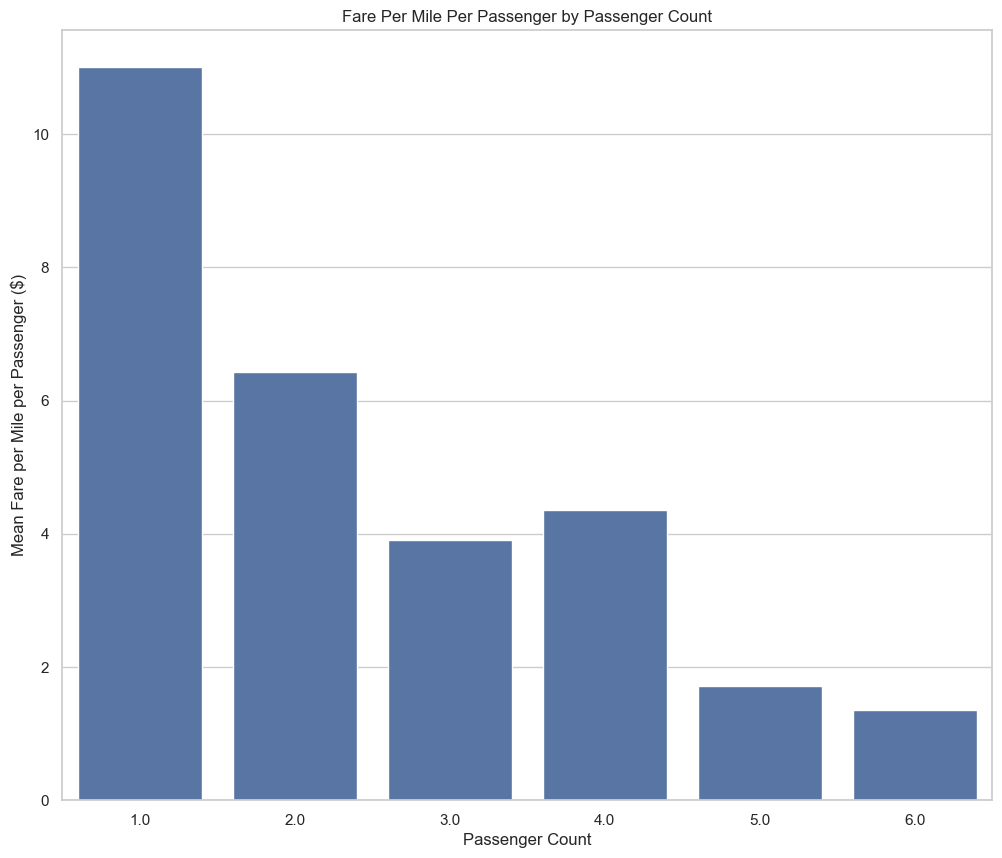

In [206]:
# Analyse the fare per mile per passenger for different passenger counts


# Ensure relevant columns are numeric
df['fare_amount'] = pd.to_numeric(df2['fare_amount'], errors='coerce')
df['trip_distance'] = pd.to_numeric(df2['trip_distance'], errors='coerce')
df['passenger_count'] = pd.to_numeric(df2['passenger_count'], errors='coerce')

# Remove invalid data (zero distance trips or zero passengers)
df = df[(df['trip_distance'] > 0) & (df['passenger_count'] > 0)].copy()

# Calculate fare per mile per passenger

df.loc[:, 'fare_per_mile_per_passenger'] = df['fare_amount'] / (df['trip_distance'] * df['passenger_count'])

# Aggregate statistics by passenger count
fare_analysis = df.groupby('passenger_count')['fare_per_mile_per_passenger'].agg(['mean', 'median']).reset_index()

# Set plot style
sns.set_style("whitegrid")

# Create a bar plot
plt.figure(figsize=(12,10))
sns.barplot(data=fare_analysis, x='passenger_count', y='mean')

# Labels and title
plt.xlabel("Passenger Count")
plt.ylabel("Mean Fare per Mile per Passenger ($)")
plt.title("Fare Per Mile Per Passenger by Passenger Count")
plt.xticks(rotation=0)

# Show plot
plt.show()

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

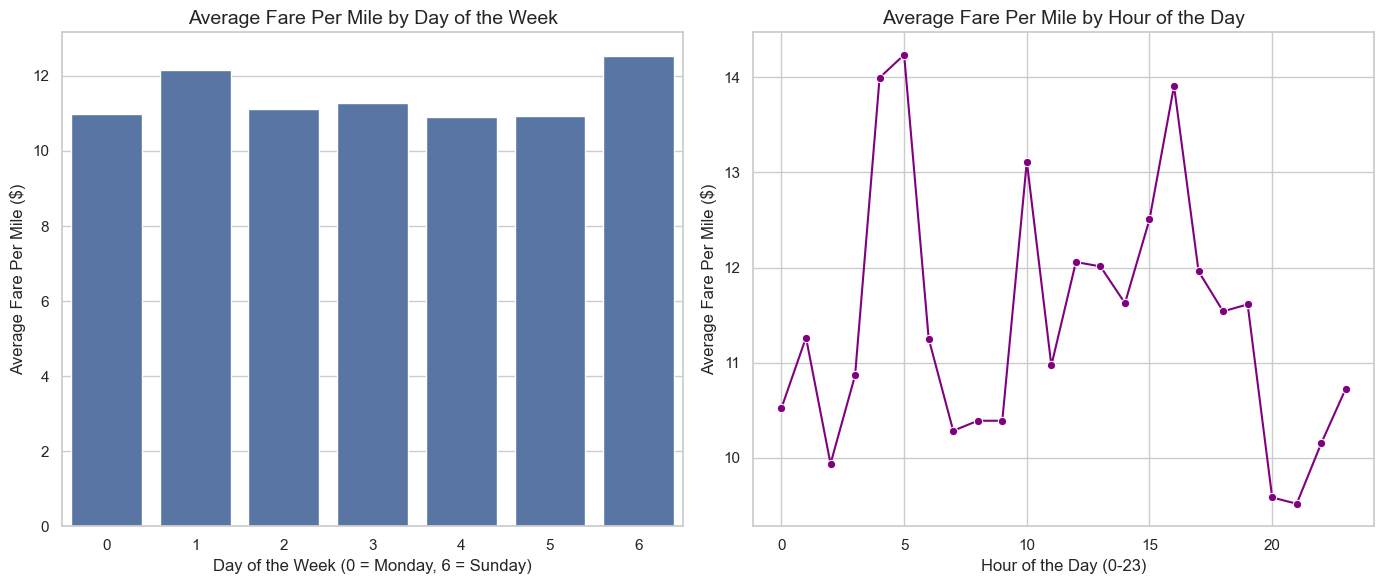

In [189]:
# Compare the average fare per mile for different days and for different times of the day

# Ensure timestamp column is in datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df2['tpep_pickup_datetime'])

# Remove invalid trips (trip_distance == 0)
df = df2[df2['trip_distance'] > 0].copy()

# Calculate Fare Per Mile (FPM)
df.loc[:, 'fare_per_mile'] = df2['fare_amount']/ df2['trip_distance']

# Extract Day of the Week and Hour of the Day
df.loc[:, 'day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6
df.loc[:, 'hour_of_day'] = df['tpep_pickup_datetime'].dt.hour  # 0-23 hours

# Compute average fare per mile for different days
avg_fare_per_mile_day = df.groupby('day_of_week')['fare_per_mile'].mean().reset_index()

# Compute average fare per mile for different hours
avg_fare_per_mile_hour = df.groupby('hour_of_day')['fare_per_mile'].mean().reset_index()

# Set plot style
sns.set_style("whitegrid")

# Create subplots for day and hour
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for days of the week
sns.barplot(data=avg_fare_per_mile_day, x='day_of_week', y='fare_per_mile',  ax=axes[0])
axes[0].set_title("Average Fare Per Mile by Day of the Week", fontsize=14)
axes[0].set_xlabel("Day of the Week (0 = Monday, 6 = Sunday)")
axes[0].set_ylabel("Average Fare Per Mile ($)")

# Plot for hours of the day
sns.lineplot(data=avg_fare_per_mile_hour, x='hour_of_day', y='fare_per_mile', marker="o", color="purple", ax=axes[1])
axes[1].set_title("Average Fare Per Mile by Hour of the Day", fontsize=14)
axes[1].set_xlabel("Hour of the Day (0-23)")
axes[1].set_ylabel("Average Fare Per Mile ($)")

# Show plots
plt.tight_layout()
plt.show()



**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

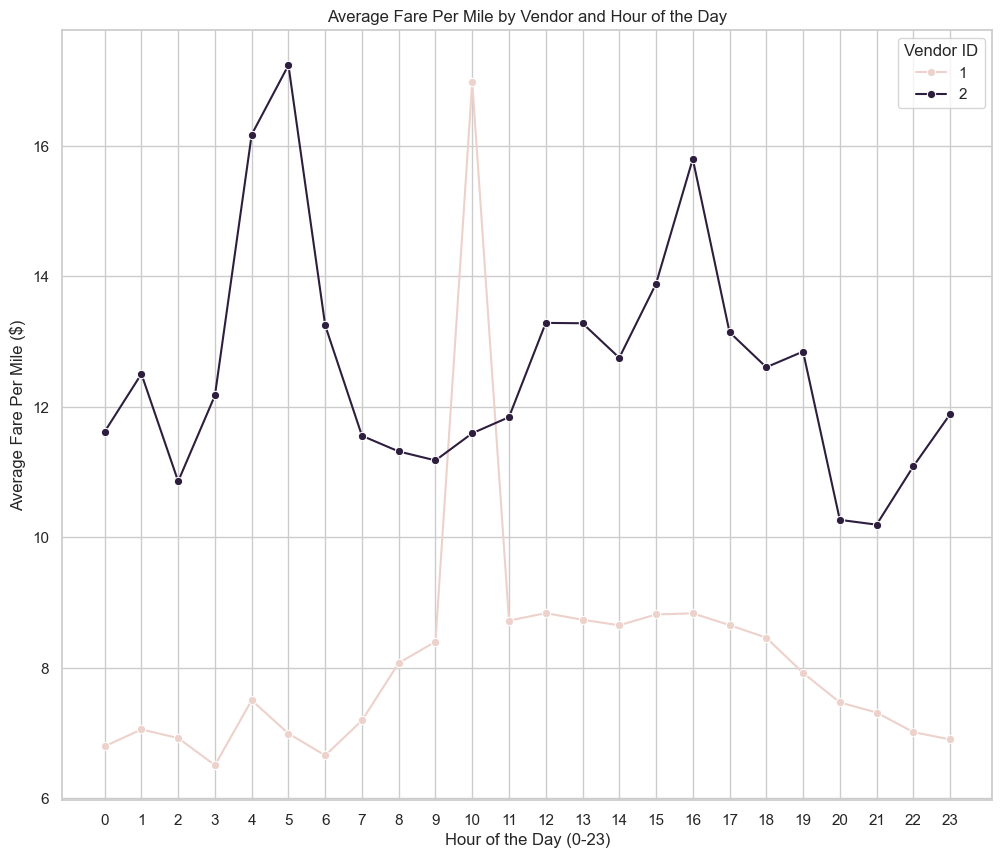

In [205]:
# Compare fare per mile for different vendors

# Ensure relevant columns are numeric
df['fare_amount'] = pd.to_numeric(df2['fare_amount'], errors='coerce')
df['trip_distance'] = pd.to_numeric(df2['trip_distance'], errors='coerce')

# Ensure timestamp column is in datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df2['tpep_pickup_datetime'], errors='coerce')

# Remove invalid trips (trip_distance == 0)
df = df2[df2['trip_distance'] > 0].copy()



# Calculate Fare Per Mile (FPM)
df.loc[:, 'fare_per_mile'] = df['fare_amount'] / df['trip_distance']

# Extract Hour of the Day
df.loc[:, 'hour_of_day'] = df['tpep_pickup_datetime'].dt.hour  # 0-23 hours

# Compute average fare per mile grouped by Vendor and Hour
fare_per_mile_vendor_hour = df.groupby(['VendorID', 'hour_of_day'])['fare_per_mile'].mean().reset_index()

# Set plot style
sns.set_style("whitegrid")

# Create a line plot
plt.figure(figsize=(12, 10))
sns.lineplot(data=fare_per_mile_vendor_hour, x='hour_of_day', y='fare_per_mile', hue='VendorID', marker="o")

# Labels and title
plt.xlabel("Hour of the Day (0-23)")
plt.ylabel("Average Fare Per Mile ($)")
plt.title("Average Fare Per Mile by Vendor and Hour of the Day")
plt.xticks(range(0, 24))  # Ensure all hours are shown
plt.legend(title="Vendor ID")

# Show plot
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


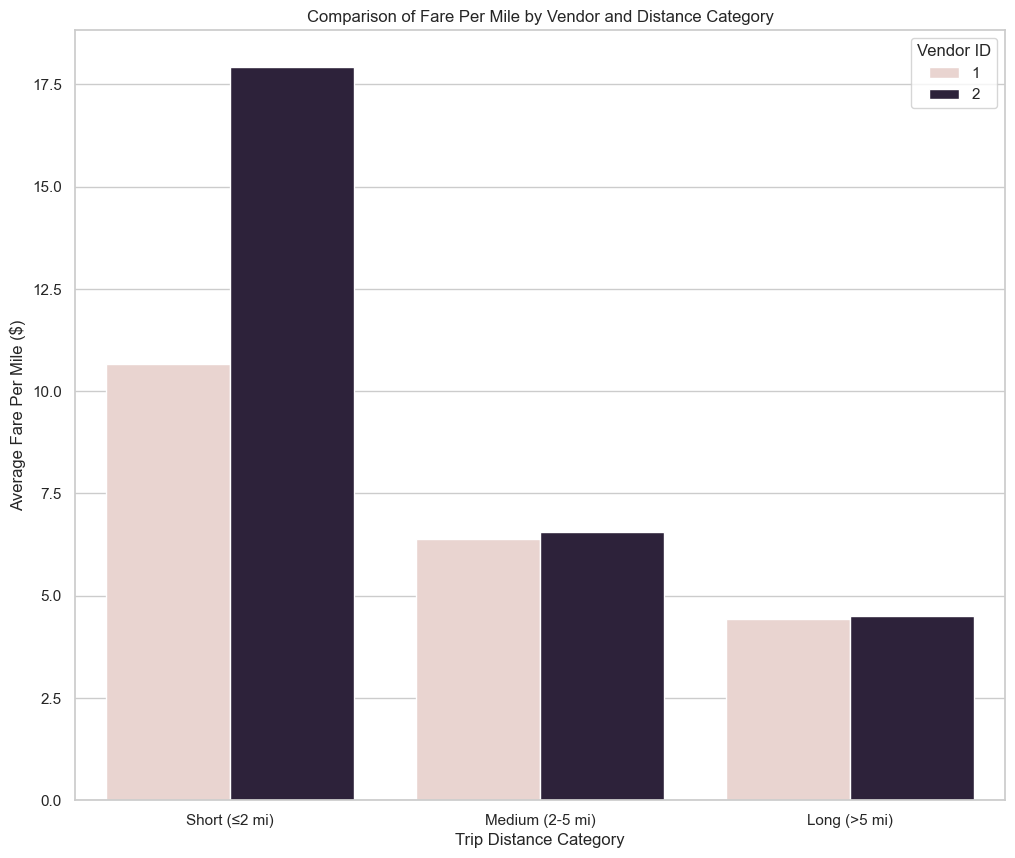

In [204]:
# Defining distance tiers

# Ensure relevant columns are numeric
df['fare_amount'] = pd.to_numeric(df2['fare_amount'], errors='coerce')
df['trip_distance'] = pd.to_numeric(df2['trip_distance'], errors='coerce')

# Remove invalid trips (trip_distance <= 0)
df = df[df['trip_distance'] > 0].copy()

# Calculate Fare Per Mile (FPM)
df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']

# Categorize trips based on distance
df['distance_category'] = pd.cut(df['trip_distance'], 
                                 bins=[0, 2, 5, float('inf')], 
                                 labels=['Short (≤2 mi)', 'Medium (2-5 mi)', 'Long (>5 mi)'])

# Compute average fare per mile grouped by Vendor and Distance Category
fare_per_mile_tiered = df.groupby(['VendorID', 'distance_category'], observed=False)['fare_per_mile'].mean().reset_index()

# Set plot style
sns.set_style("whitegrid")

# Create a grouped bar plot
plt.figure(figsize=(12,10))
sns.barplot(data=fare_per_mile_tiered, x='distance_category', y='fare_per_mile', hue='VendorID')

# Labels and title
plt.xlabel("Trip Distance Category")
plt.ylabel("Average Fare Per Mile ($)")
plt.title("Comparison of Fare Per Mile by Vendor and Distance Category")
plt.legend(title="Vendor ID")

# Show plot
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

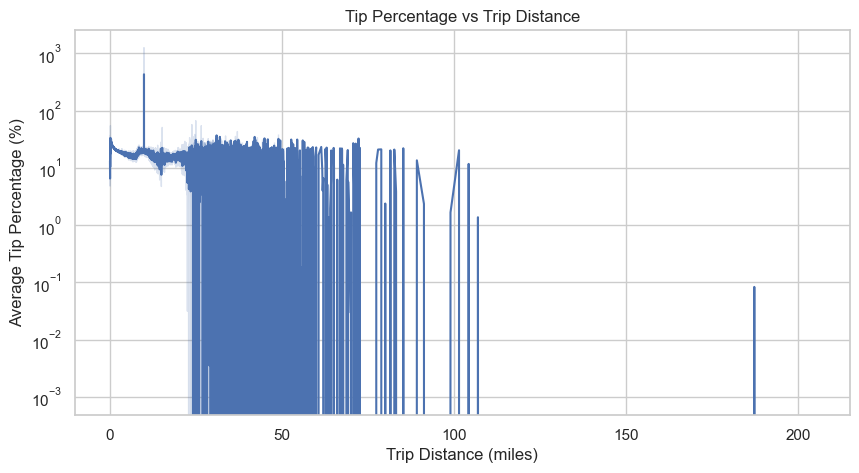

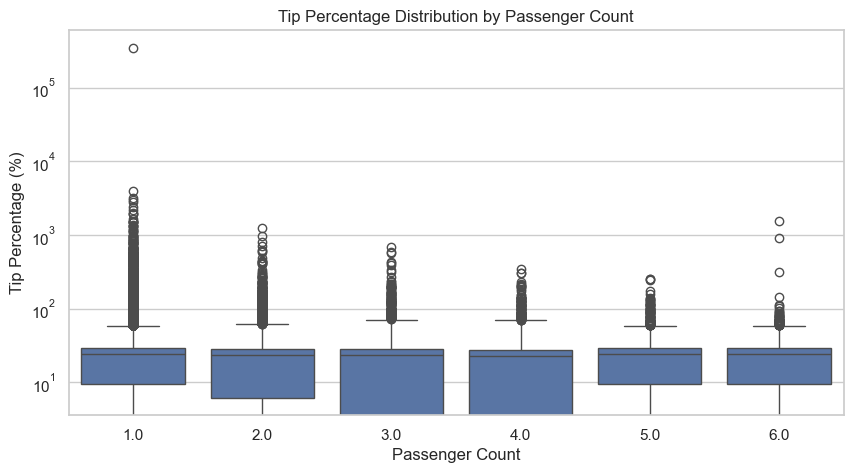

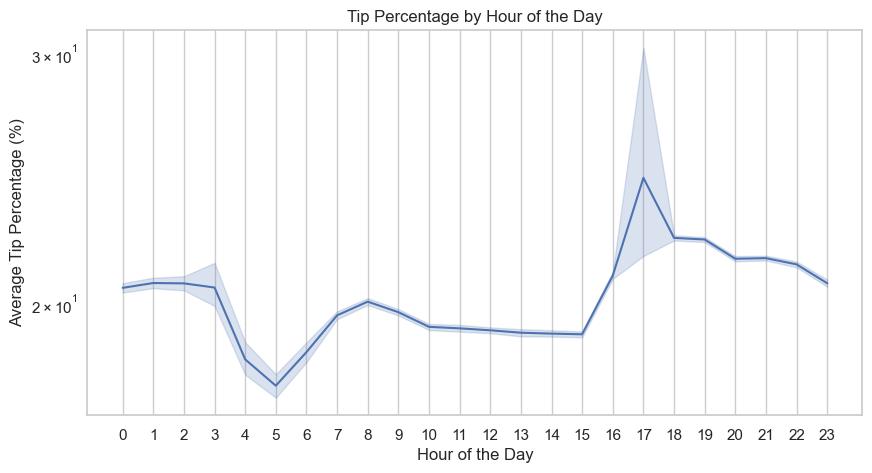

In [199]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

# Ensure relevant columns are numeric
df['fare_amount'] = pd.to_numeric(df2['fare_amount'], errors='coerce')
df['tip_amount'] = pd.to_numeric(df2['tip_amount'], errors='coerce')
df['trip_distance'] = pd.to_numeric(df2['trip_distance'], errors='coerce')
df['passenger_count'] = pd.to_numeric(df2['passenger_count'], errors='coerce')

# Ensure timestamp is in datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df2['tpep_pickup_datetime'], errors='coerce')

# Remove invalid trips (zero fare or distance)
df = df[(df['fare_amount'] > 0) & (df['trip_distance'] > 0)].copy()

# Calculate Tip Percentage
df['tip_percentage'] = (df['tip_amount'] / df['fare_amount']) * 100

# Extract Hour of Pickup
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Set Seaborn style
sns.set_style("whitegrid")

##Tip Percentage vs Trip Distance
plt.figure(figsize=(10, 5))
sns.lineplot(x=df['trip_distance'], y=df['tip_percentage'])

# Apply log scale
plt.yscale("log")

plt.xlabel("Trip Distance (miles)")
plt.ylabel("Average Tip Percentage (%)")
plt.title("Tip Percentage vs Trip Distance")
plt.show()

## Tip Percentage vs Passenger Count
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['passenger_count'], y=df['tip_percentage'])

# Apply log scale
plt.yscale("log")

plt.xlabel("Passenger Count")
plt.ylabel("Tip Percentage (%)")
plt.title("Tip Percentage Distribution by Passenger Count")
plt.show()

## Tip Percentage vs Pickup Hour
plt.figure(figsize=(10, 5))
sns.lineplot(x=df['pickup_hour'], y=df['tip_percentage'])

# Apply log scale
plt.yscale("log")

plt.xlabel("Hour of the Day")
plt.ylabel("Average Tip Percentage (%)")
plt.title("Tip Percentage by Hour of the Day")
plt.xticks(range(0, 24))  # Show all 24 hours
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

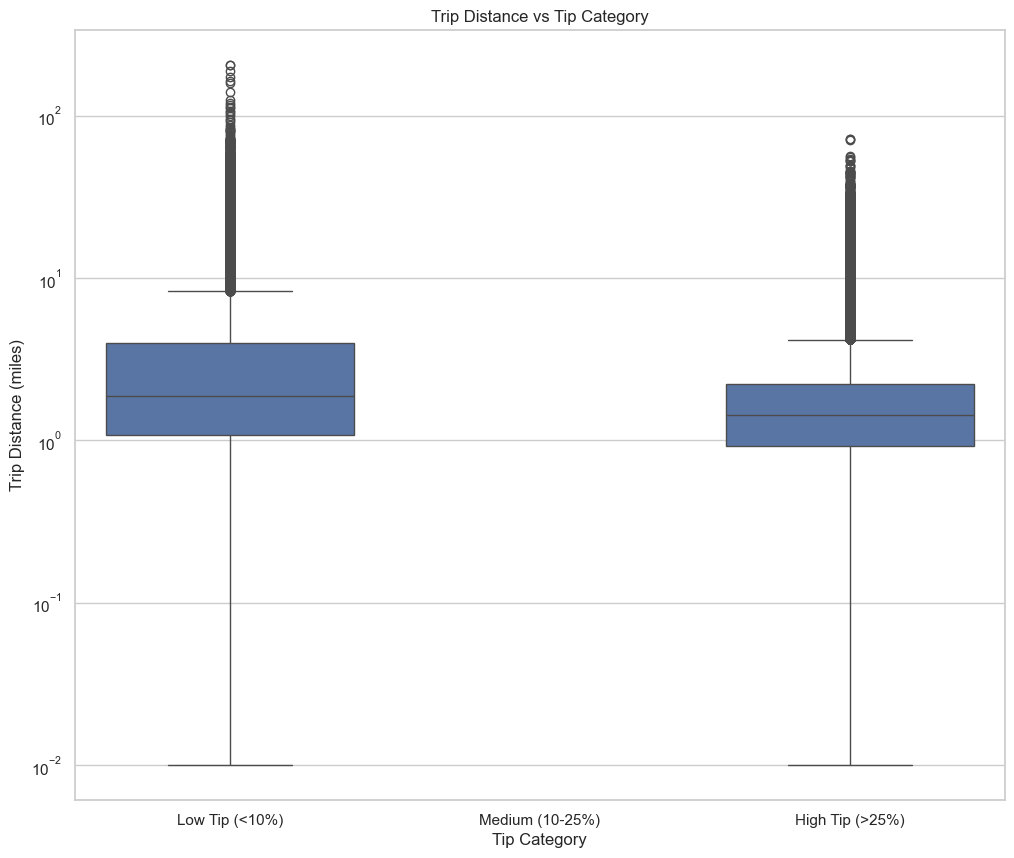

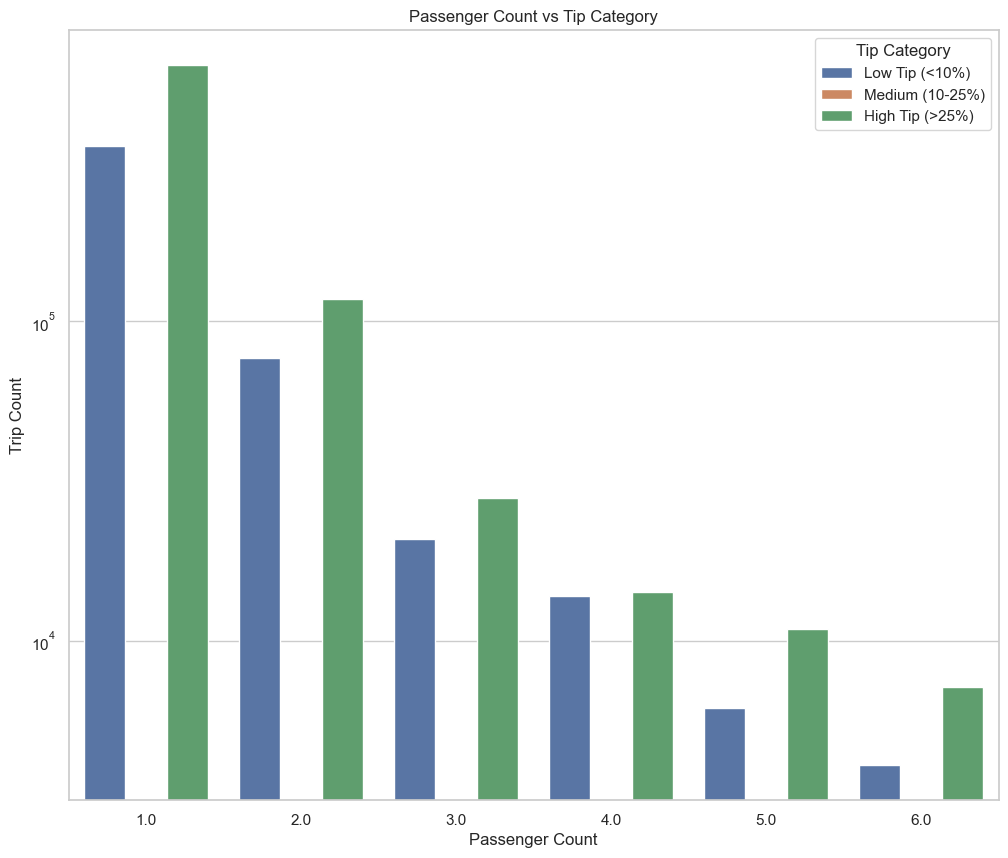

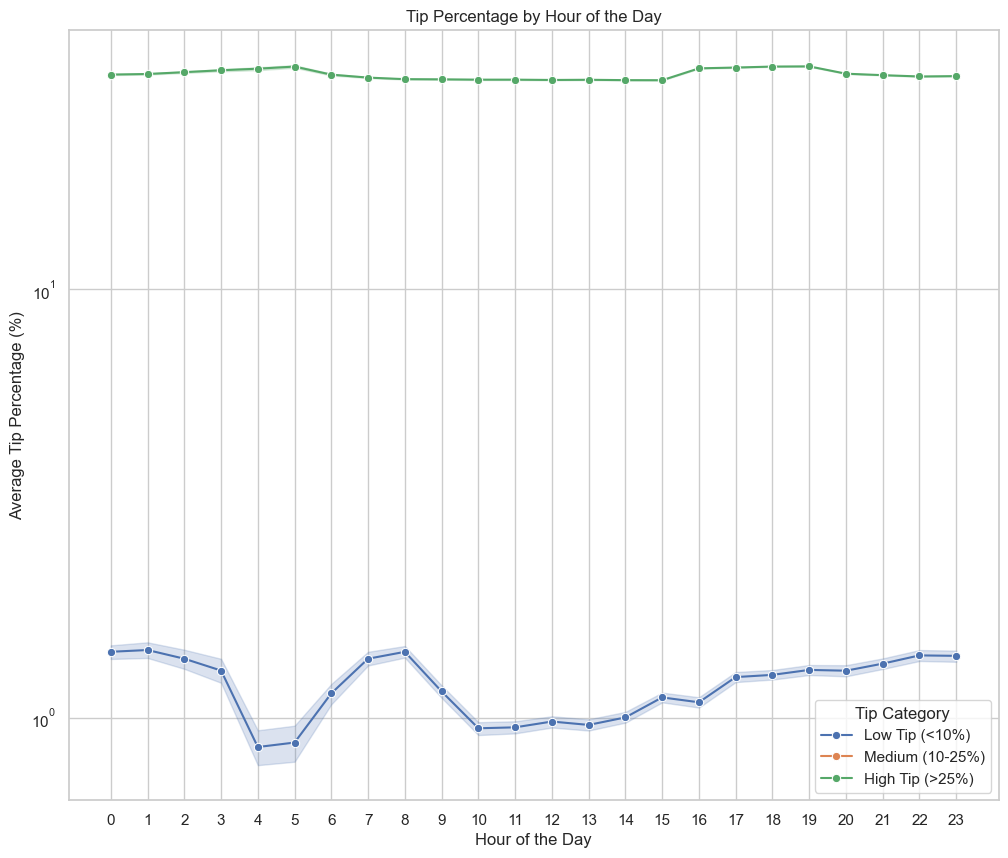

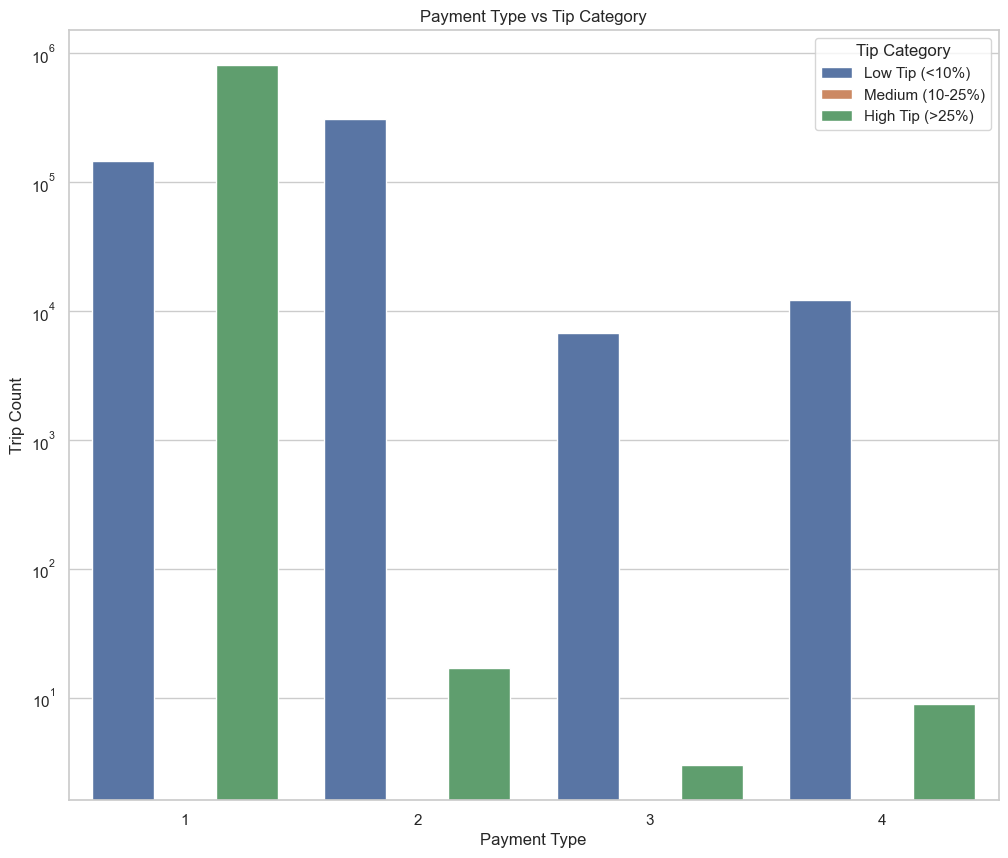

In [203]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

# Ensure numeric columns
df['fare_amount'] = pd.to_numeric(df2['fare_amount'], errors='coerce')
df['tip_amount'] = pd.to_numeric(df2['tip_amount'], errors='coerce')
df['trip_distance'] = pd.to_numeric(df2['trip_distance'], errors='coerce')
df['passenger_count'] = pd.to_numeric(df2['passenger_count'], errors='coerce')

# Ensure timestamp is in datetime format
df['pickup_datetime'] = pd.to_datetime(df2['tpep_pickup_datetime'], errors='coerce')

# Remove invalid trips (zero fare or distance)
df = df[(df['fare_amount'] > 0) & (df['trip_distance'] > 0)].copy()

# Calculate Tip Percentage
df['tip_percentage'] = (df['tip_amount'] / df['fare_amount']) * 100

# Extract Pickup Hour
df['pickup_hour'] = df['pickup_datetime'].dt.hour

# Categorize tips into two groups
df['tip_category'] = pd.cut(df['tip_percentage'], bins=[-1, 10, 25, 100], labels=['Low Tip (<10%)', 'Medium (10-25%)', 'High Tip (>25%)'])

# Filter for only Low and High tip categories
df_filtered = df[df['tip_category'].isin(['Low Tip (<10%)', 'High Tip (>25%)'])]

# Set Seaborn style
sns.set_style("whitegrid")

##1. Trip Distance vs Tip Category
plt.figure(figsize=(12,10))
sns.boxplot(x='tip_category', y='trip_distance', data=df_filtered)

# Apply log scale
plt.yscale("log")

plt.xlabel("Tip Category")
plt.ylabel("Trip Distance (miles)")
plt.title("Trip Distance vs Tip Category")
plt.show()

##Passenger Count vs Tip Category
plt.figure(figsize=(12,10))
sns.countplot(x='passenger_count', hue='tip_category', data=df_filtered)

# Apply log scale
plt.yscale("log")

plt.xlabel("Passenger Count")
plt.ylabel("Trip Count")
plt.title("Passenger Count vs Tip Category")
plt.legend(title="Tip Category")
plt.show()

## Pickup Hour vs Tip Category
plt.figure(figsize=(12,10))
sns.lineplot(data=df_filtered, x='pickup_hour', y='tip_percentage', hue='tip_category', marker="o")

# Apply log scale
plt.yscale("log")

plt.xlabel("Hour of the Day")
plt.ylabel("Average Tip Percentage (%)")
plt.title("Tip Percentage by Hour of the Day")
plt.xticks(range(0, 24))
plt.legend(title="Tip Category")
plt.show()

##Payment Type vs Tip Category
plt.figure(figsize=(12,10))
sns.countplot(x='payment_type', hue='tip_category', data=df_filtered)

# Apply log scale
plt.yscale("log")

plt.xlabel("Payment Type")
plt.ylabel("Trip Count")
plt.title("Payment Type vs Tip Category")
plt.legend(title="Tip Category")
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

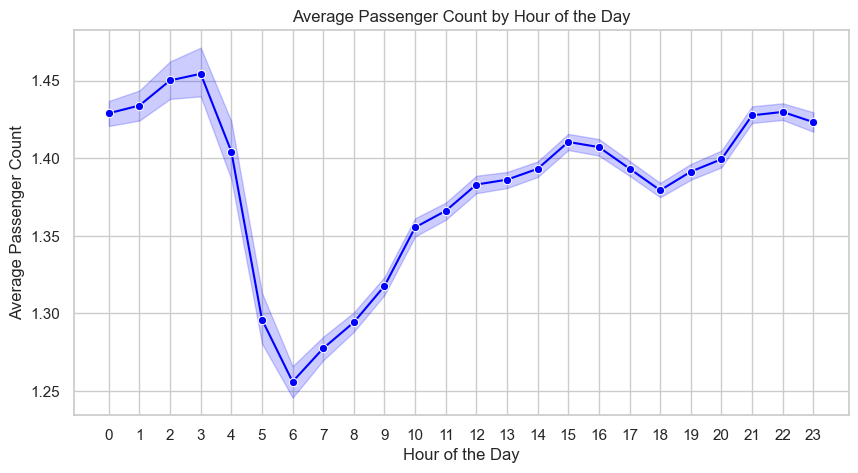

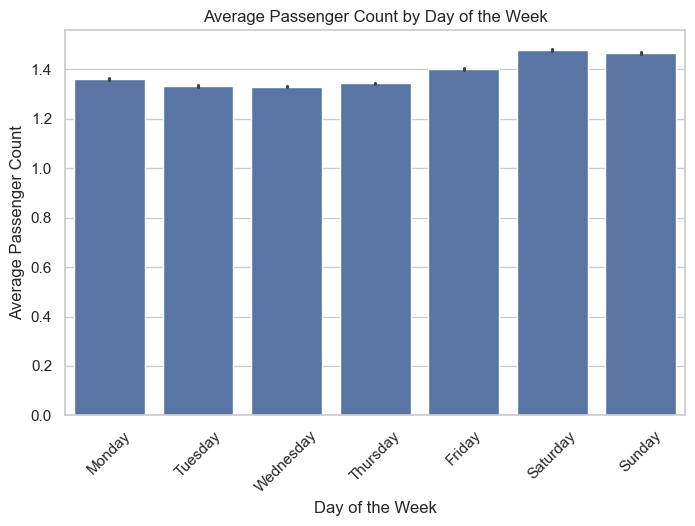

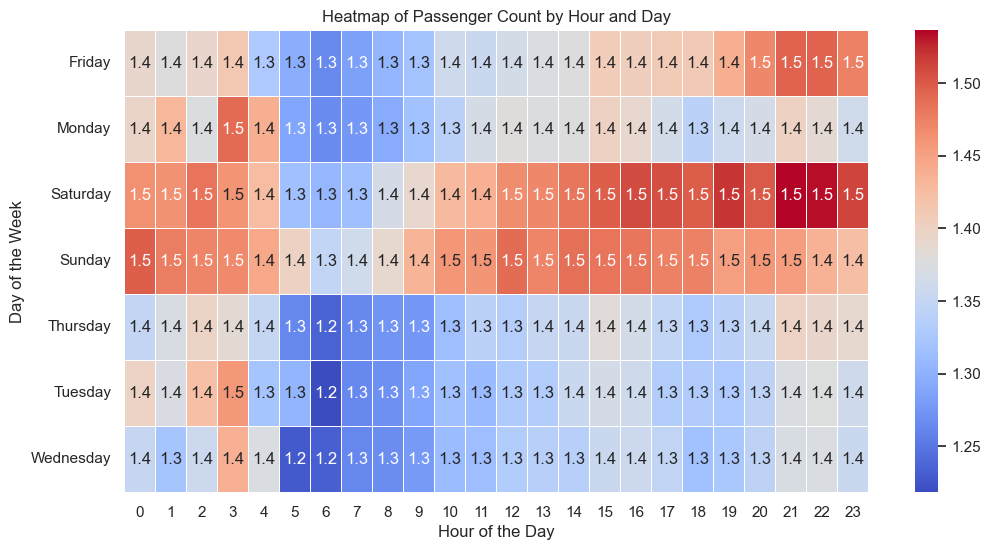

In [208]:
# See how passenger count varies across hours and days

# Ensure passenger_count is numeric
df['passenger_count'] = pd.to_numeric(df2['passenger_count'], errors='coerce')

# Ensure pickup_datetime is in datetime format
df['pickup_datetime'] = pd.to_datetime(df2['tpep_pickup_datetime'], errors='coerce')

# Extract hour and day of the week
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_day'] = df['pickup_datetime'].dt.day_name()  # 'Monday', 'Tuesday', etc.

# Set Seaborn style
sns.set_style("whitegrid")

## Average Passenger Count by Hour of the Day
plt.figure(figsize=(10, 5))
sns.lineplot(x=df['pickup_hour'], y=df['passenger_count'], estimator='mean', marker="o", color='blue')
plt.xlabel("Hour of the Day")
plt.ylabel("Average Passenger Count")
plt.title("Average Passenger Count by Hour of the Day")
plt.xticks(range(0, 24))
plt.show()

##Average Passenger Count by Day of the Week
plt.figure(figsize=(8, 5))
sns.barplot(x=df['pickup_day'], y=df['passenger_count'], estimator='mean', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel("Day of the Week")
plt.ylabel("Average Passenger Count")
plt.title("Average Passenger Count by Day of the Week")
plt.xticks(rotation=45)
plt.show()

## Passenger Count Heatmap (Hour vs. Day)
df_heatmap = df.groupby(['pickup_day', 'pickup_hour'])['passenger_count'].mean().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(df_heatmap, cmap="coolwarm", annot=True, fmt=".1f", linewidths=0.5)
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.title("Heatmap of Passenger Count by Hour and Day")
plt.show()



**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

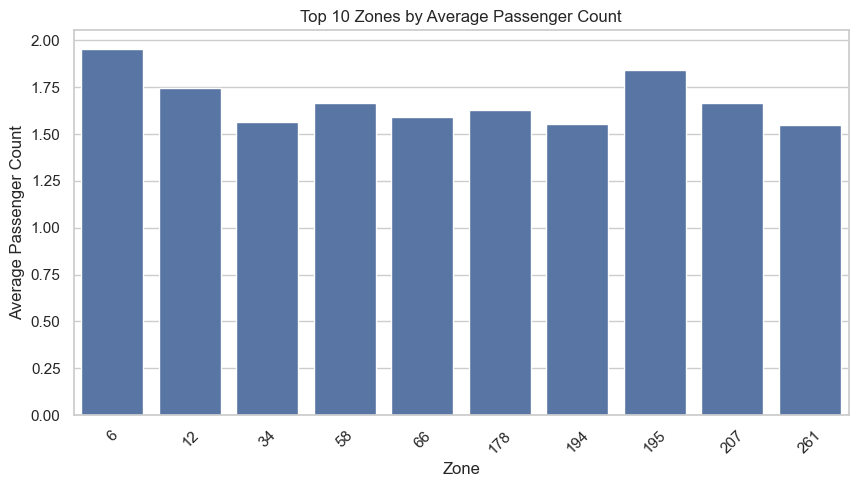

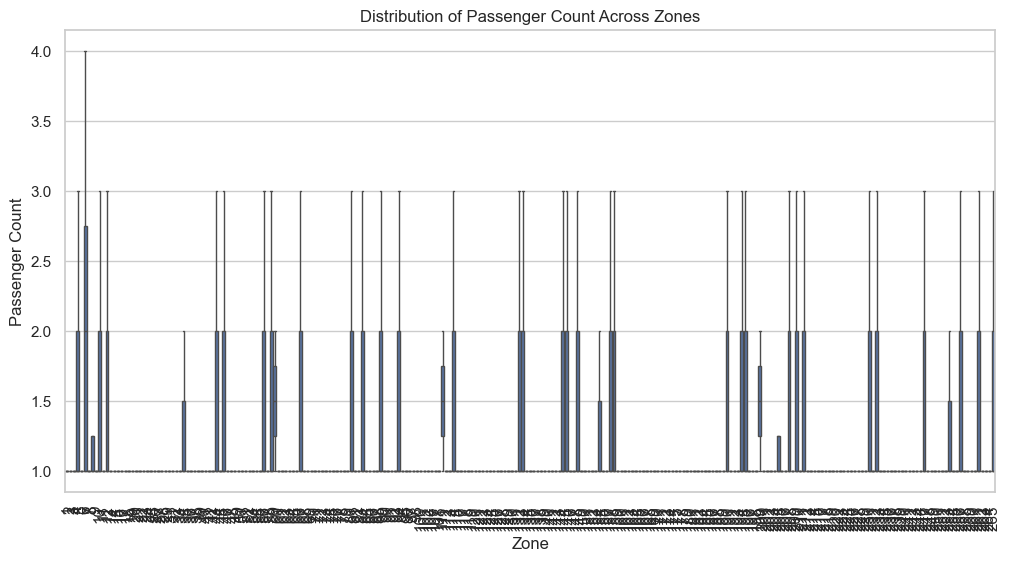

In [210]:
# How does passenger count vary across zones

# Ensure necessary columns are numeric
df['passenger_count'] = pd.to_numeric(df2['passenger_count'], errors='coerce')


# Ensure Zone Column is Present
if 'pickup_zone' in df.columns:
    zone_column = 'pickup_zone'
elif 'PULocationID' in df.columns:
    zone_column = 'PULocationID'  

# Compute average passenger count per zone
zone_avg_passengers = df.groupby(zone_column)['passenger_count'].mean().reset_index()
zone_avg_passengers = zone_avg_passengers.sort_values(by='passenger_count', ascending=False).head(10)  # Top 10 zones

# Set Seaborn style
sns.set_style("whitegrid")

##Top 10 Zones by Average Passenger Count
plt.figure(figsize=(10, 5))
sns.barplot(data=zone_avg_passengers, x=zone_column, y='passenger_count')
plt.xlabel("Zone")
plt.ylabel("Average Passenger Count")
plt.title("Top 10 Zones by Average Passenger Count")
plt.xticks(rotation=45)
plt.show()

## Distribution of Passenger Count Across All Zones
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x=zone_column, y="passenger_count", showfliers=False)
plt.xlabel("Zone")
plt.ylabel("Passenger Count")
plt.title("Distribution of Passenger Count Across Zones")
plt.xticks(rotation=90)
plt.show()



In [215]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

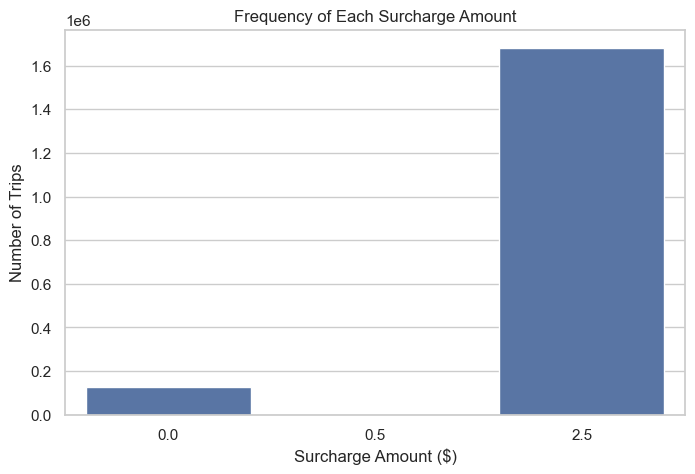

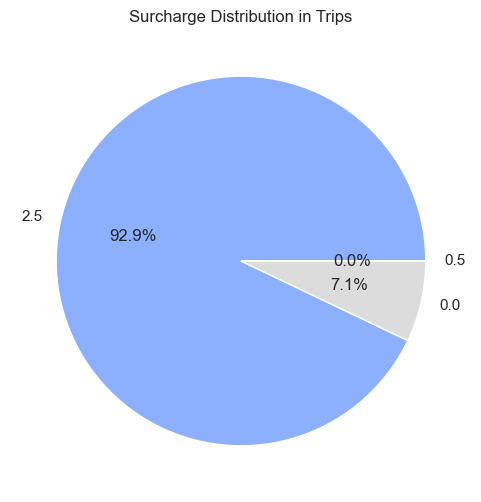

In [214]:
# How often is each surcharge applied?


# Ensure surcharge column is numeric
df['surcharge'] = pd.to_numeric(df2['congestion_surcharge'], errors='coerce')

# Compute frequency of each surcharge amount
surcharge_counts = df['surcharge'].value_counts().reset_index()
surcharge_counts.columns = ['surcharge_amount', 'count']

# Set Seaborn style
sns.set_style("whitegrid")

## Bar Chart of Surcharge Frequency
plt.figure(figsize=(8, 5))
sns.barplot(data=surcharge_counts, x='surcharge_amount', y='count')
plt.xlabel("Surcharge Amount ($)")
plt.ylabel("Number of Trips")
plt.title("Frequency of Each Surcharge Amount")
plt.show()

##Pie Chart of Surcharge Distribution
plt.figure(figsize=(6, 6))
plt.pie(surcharge_counts['count'], labels=surcharge_counts['surcharge_amount'], autopct='%1.1f%%', colors=sns.color_palette("coolwarm", len(surcharge_counts)))
plt.title("Surcharge Distribution in Trips")
plt.show()



## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [2]:
# - Since taxi demand peaks at 6 PM and midweek (Thursday), routing algorithms should prioritize these high-traffic areas for cab availability.
# -	Assign more taxis to high-revenue quarters (Q2 & Q4) and areas with high trip volumes.
# -	Use historical trip data to predict demand surges and dispatch cabs in advance.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [1]:
# -	Position cabs near the top 10 pickup zones identified in the report.
# -	Since nighttime has slow-moving traffic in certain zones, increase availability in well-lit and high-demand areas.
# -	Deploy more cabs in Q2 and Q4, as these have the highest revenue.


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [3]:
# -	Charge higher rates for longer trips, as there's a positive correlation between distance and fare.
# -	Differentiate pricing for single vs. multiple passengers to maximize per-mile revenue.
